# Loading

In [1]:
import gensim
import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

%matplotlib inline

# Plotting

In [6]:
# DISCLAIMER

# This block's Original source code for GensimWord2vecPlotter helper class
# taken at: https://soumilshah1995.blogspot.com/2020/05/gensim-word2vec-visualization-helper.html

# Modifications were made by me (Aleksa Kostic) today April 24, 2022 as necessary
# for visualization purposes. Figures can be found in "/capstone/figures/"

from sklearn.decomposition import PCA
import pandas as pd
import os
import numpy as np
from gensim.models import Word2Vec


class GensimWord2vecPlotter(object):

    __slots__ = ["model", "words", "result", "_tem"]

    def __init__(self, model):
        self.model = model
        self.words = None
        self.result = None
        self._tem = self.preprocess()

    def plot_scatter_words(self, Size=80):
        SIZE = Size
        words = self.words
        result = self.result
        model = self.model
        plt.figure(figsize=(16, 11))
        """for i, word in enumerate(words):
            if i == SIZE:
                break
            
            plt.annotate(word,
                         xy=(result[i, 0], result[i, 1]),
                         horizontalalignment='left',verticalalignment='bottom')"""

        plt.scatter(result[:SIZE, 0], result[:SIZE, 1],s=(40,),color='black', alpha=0.2)
        title = f"Window: {model.window};  Min count: {model.min_count};  Epochs: {model.epochs}"
        plt.title(title)
        plt.grid(True, alpha=0.4)
        plt.legend()


    def preprocess(self):
        """
        Pre Processing sets all the variable in constructor
        :return: None
        """
        model = self.model
        X = model.wv[model.wv.key_to_index]
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        words = list(model.wv.key_to_index)
        self.words = words
        self.result = result

    def getPandasDF(self):
        result = self.result
        words = self.words
        
        x = [result[i, 0]  for i, word in enumerate(words)  ]
        y = [result[i, 1]  for i, word in enumerate(words)  ]

        wordsdf = pd.DataFrame(data={
            "words":words,
            "x":x,
            "y":y
        })
        
        return wordsdf


    def plot_catter(self):

        model = self.model
        X = model.wv[model.wv.key_to_index]
        result = self.result
        words = self.words

        x = [result[i, 0]  for i, word in enumerate(words)  ]
        y = [result[i, 1]  for i, word in enumerate(words)  ]

        wordsdf = pd.DataFrame(data={
            "words":words,
            "x":x,
            "y":y
        })
        wordsdf.plot.scatter("x", "y", s=10, figsize=(20, 12))

PCA with two components gives us x-y coordinates for words within the corpus that built the word2vec models.

In [7]:
def plotwords(model, word, color, df):
    for w in [q[0] for q in model.wv.most_similar(word)]:
        plt.annotate(w, 
                     xy=(df[df['words']==w].x.item(),
                         df[df['words']==w].y.item()),
                     color=color,fontweight='bold')

1
2


No handles with labels found to put in legend.


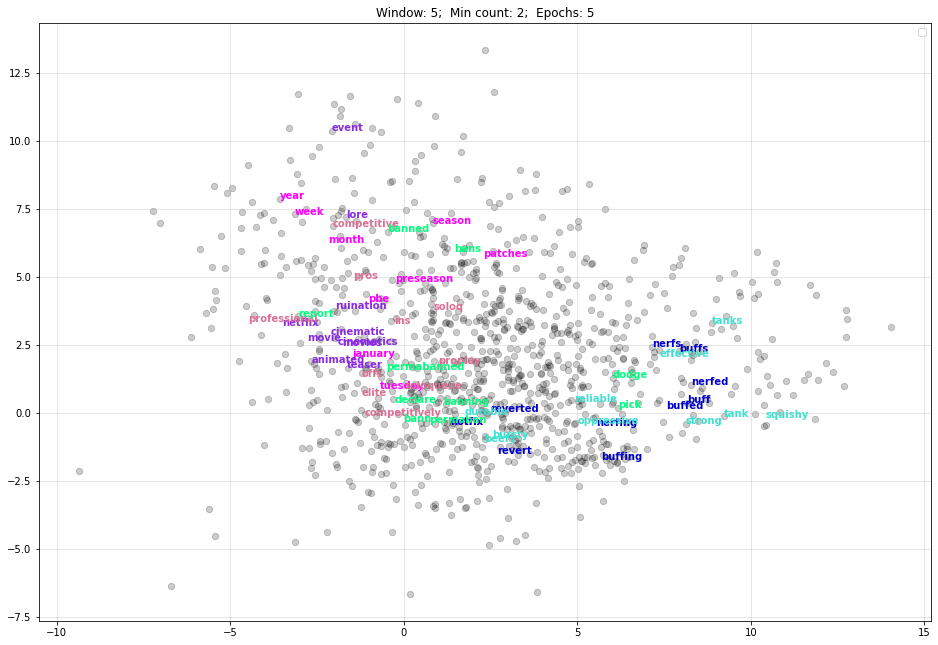

3


No handles with labels found to put in legend.


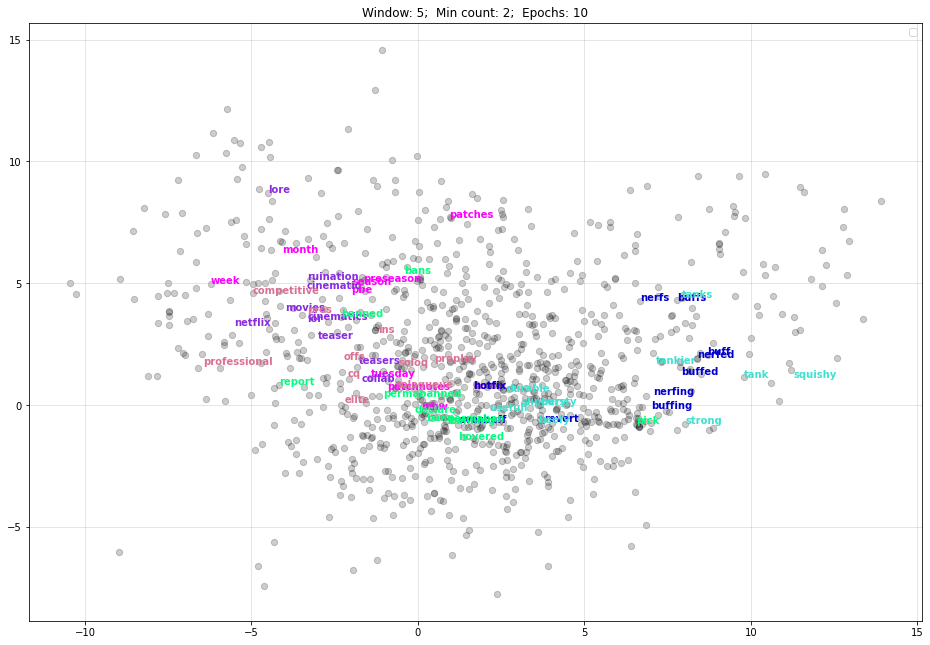

4


No handles with labels found to put in legend.


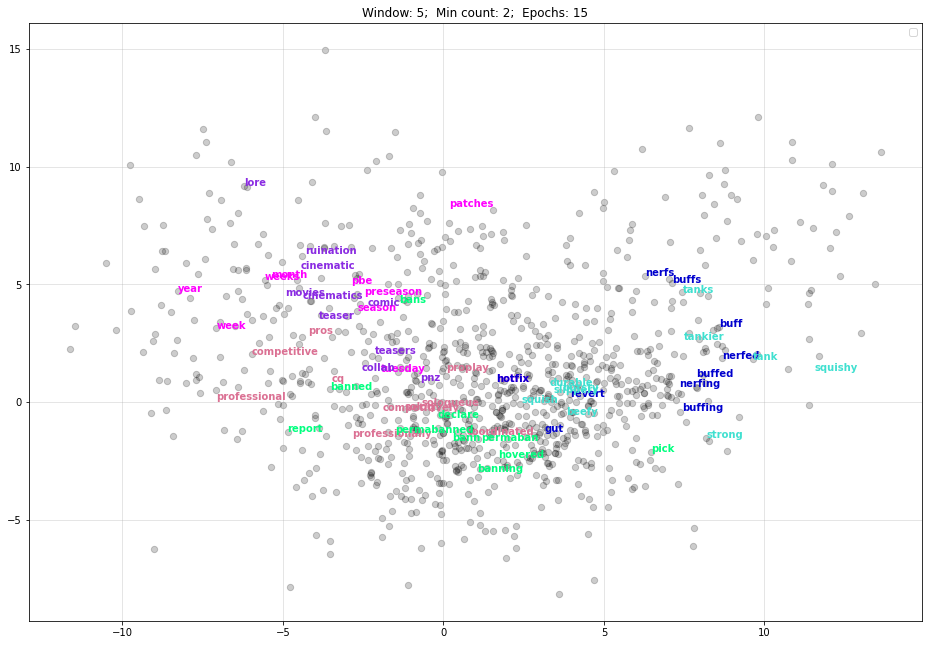

5


No handles with labels found to put in legend.


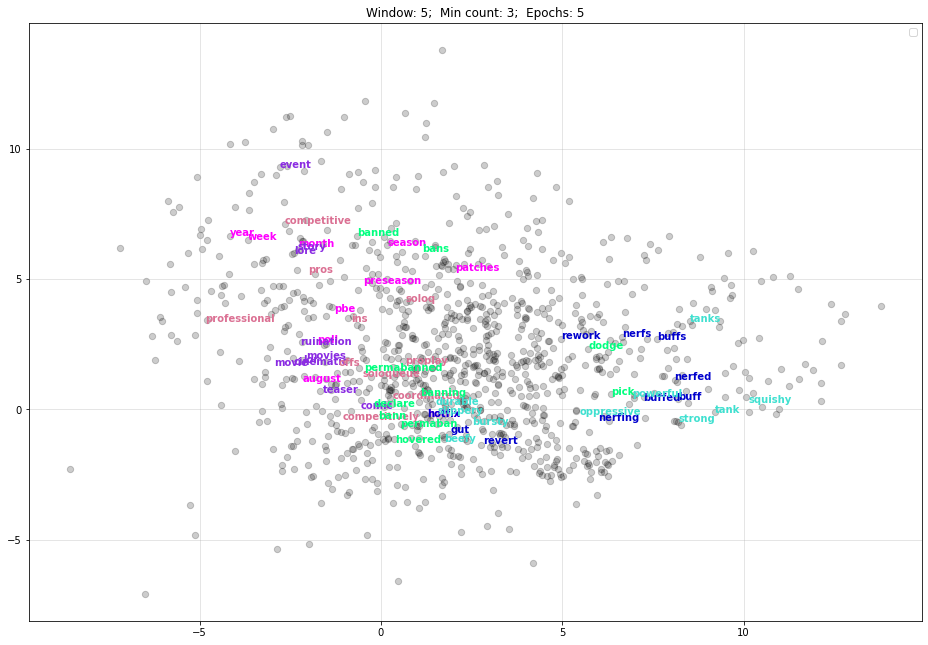

6


No handles with labels found to put in legend.


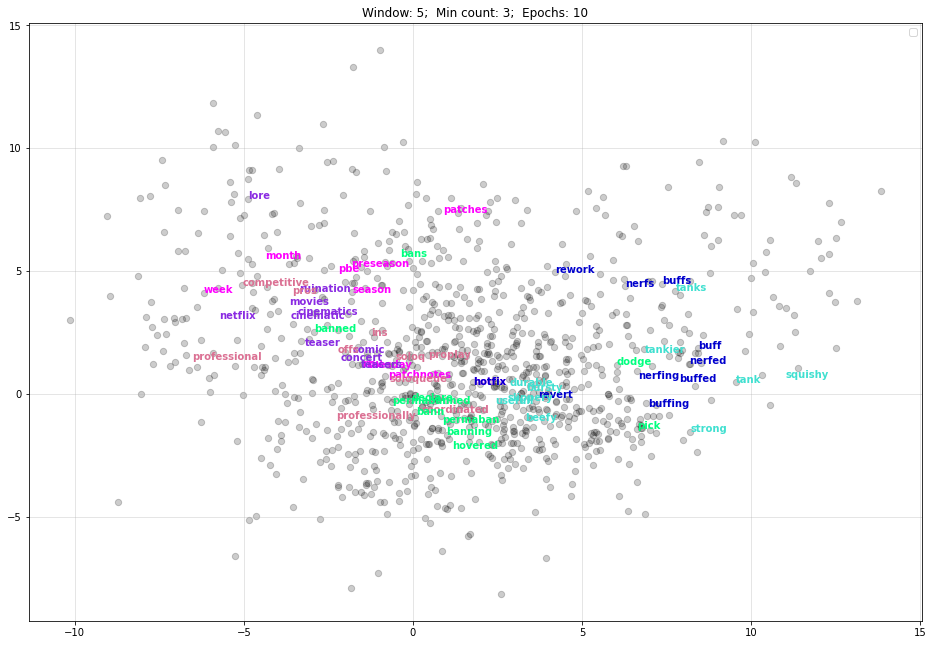

7


No handles with labels found to put in legend.


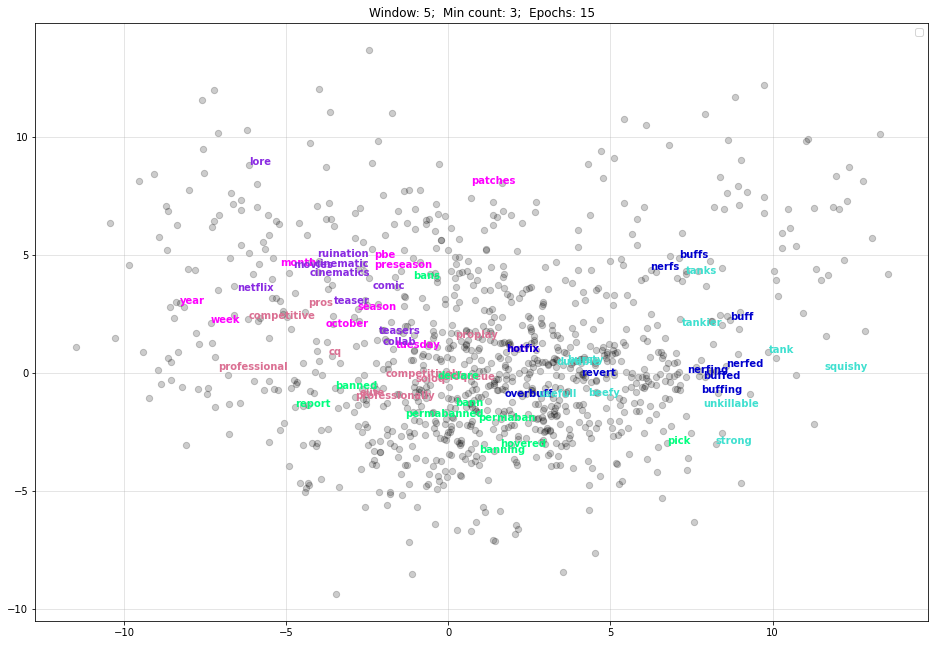

8


No handles with labels found to put in legend.


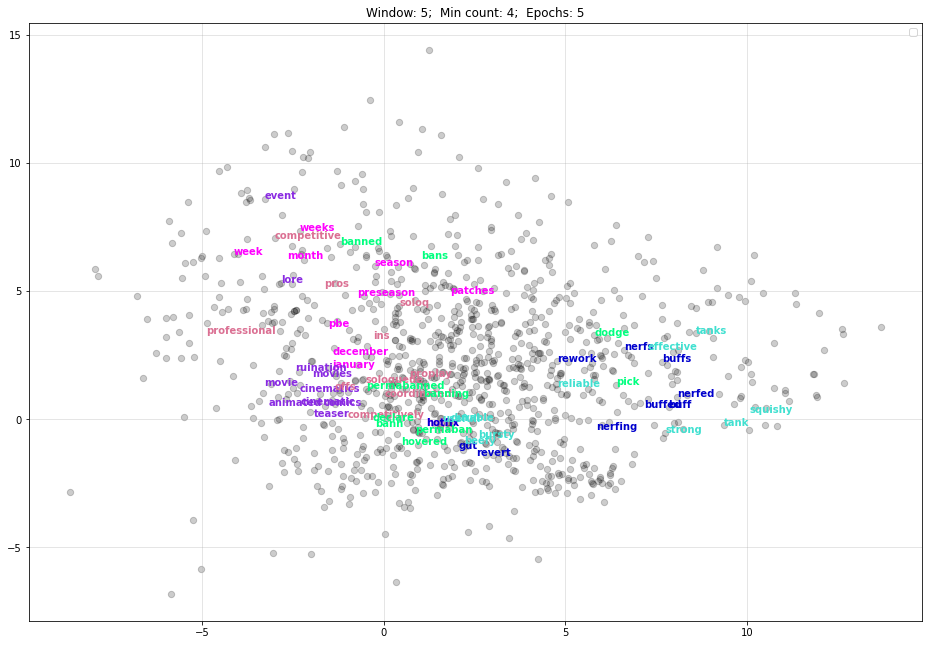

9


No handles with labels found to put in legend.


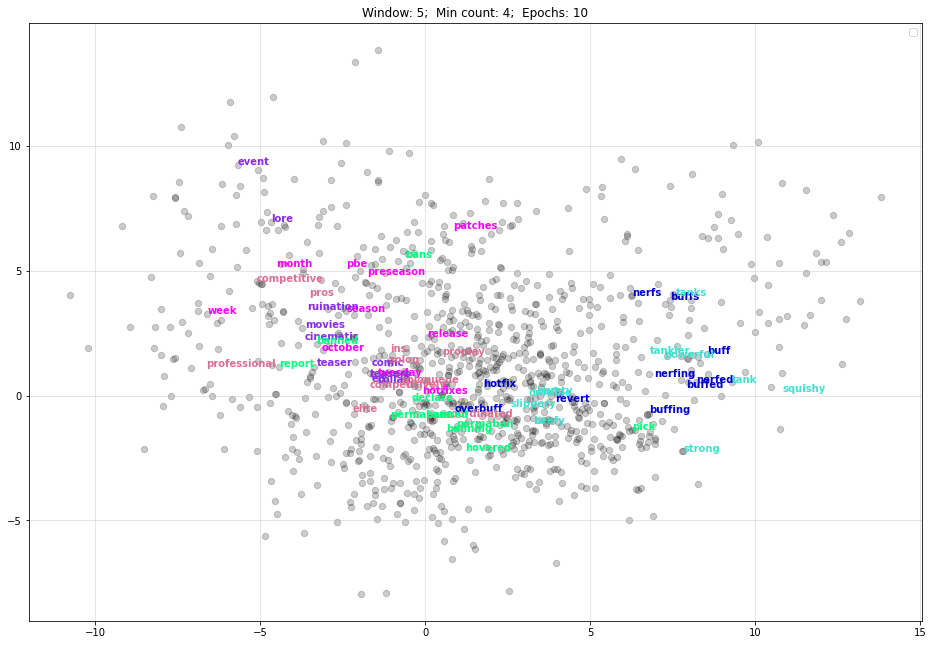

10


No handles with labels found to put in legend.


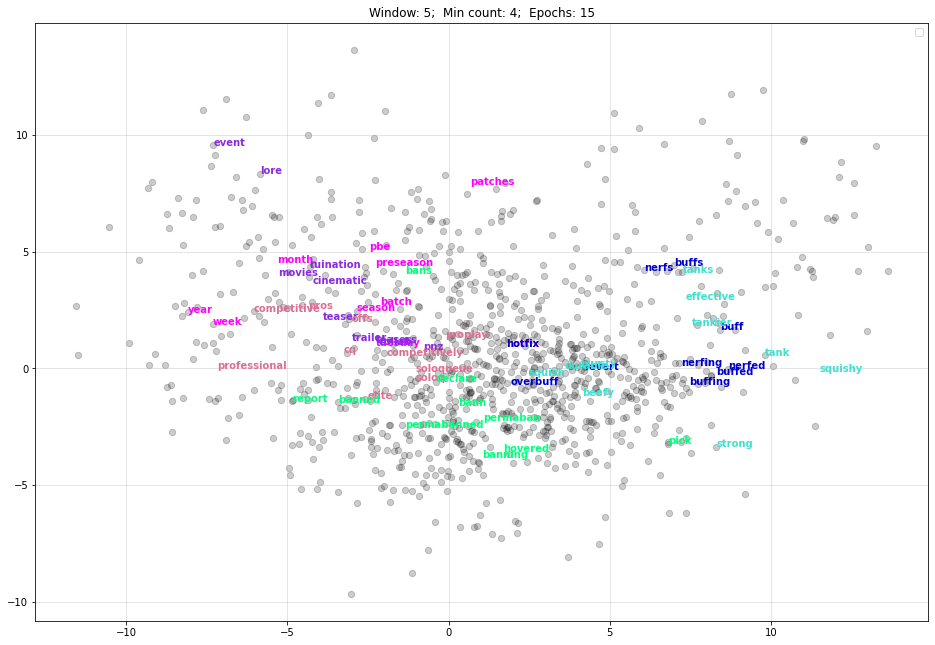

11


No handles with labels found to put in legend.


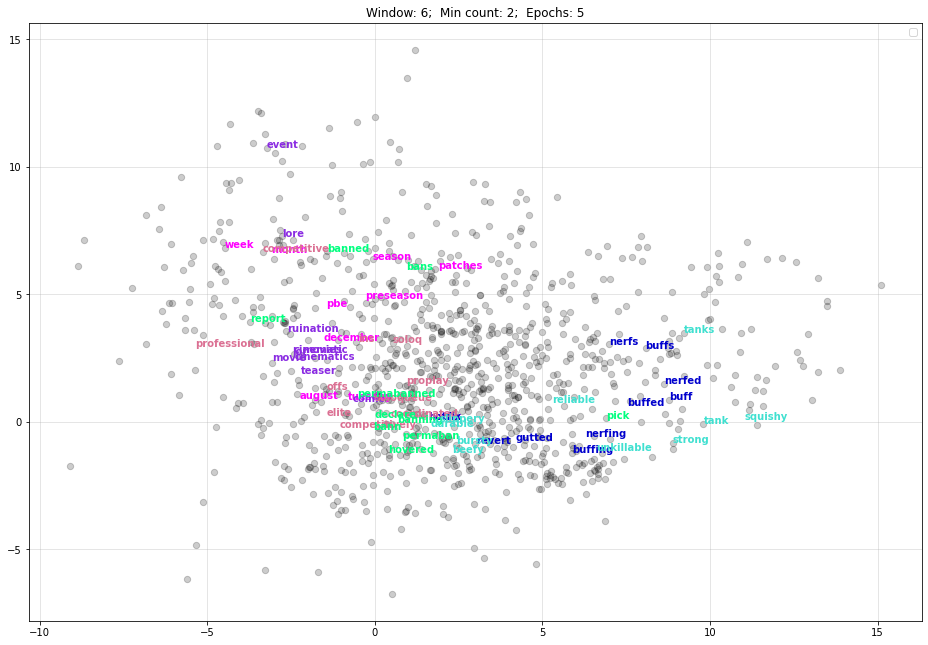

12


No handles with labels found to put in legend.


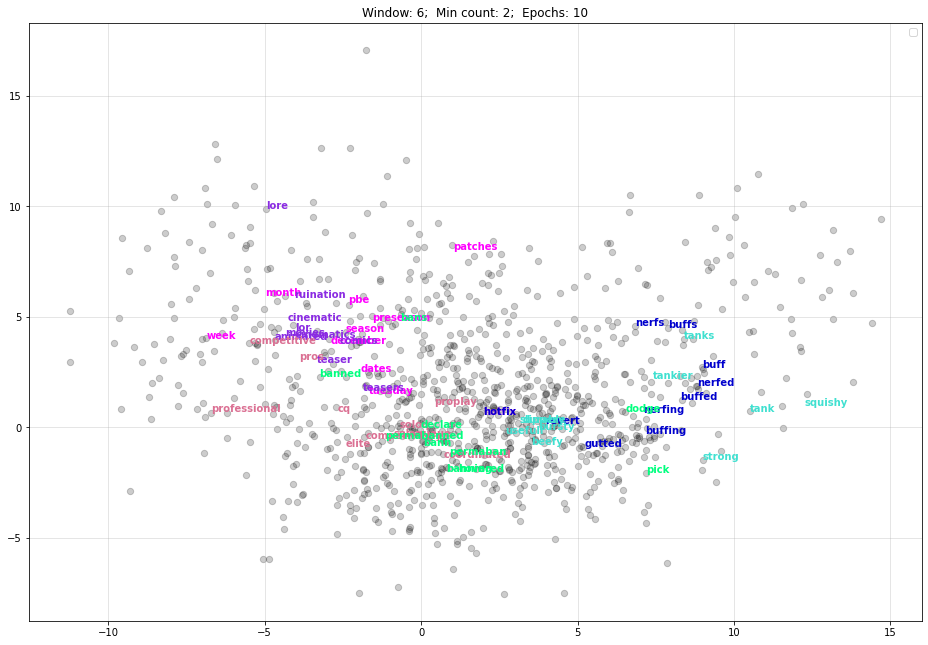

13


No handles with labels found to put in legend.


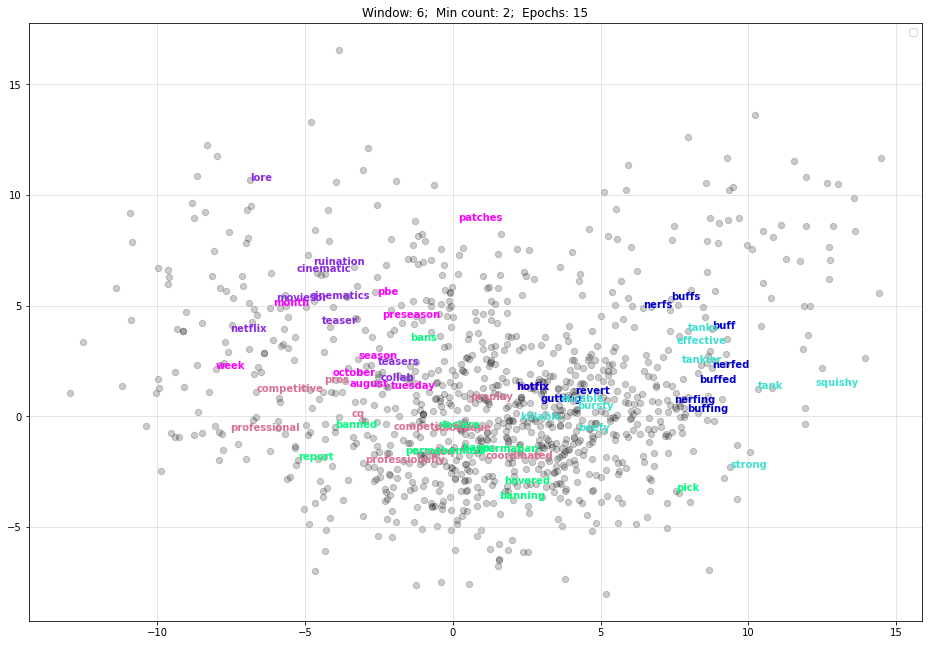

14


No handles with labels found to put in legend.


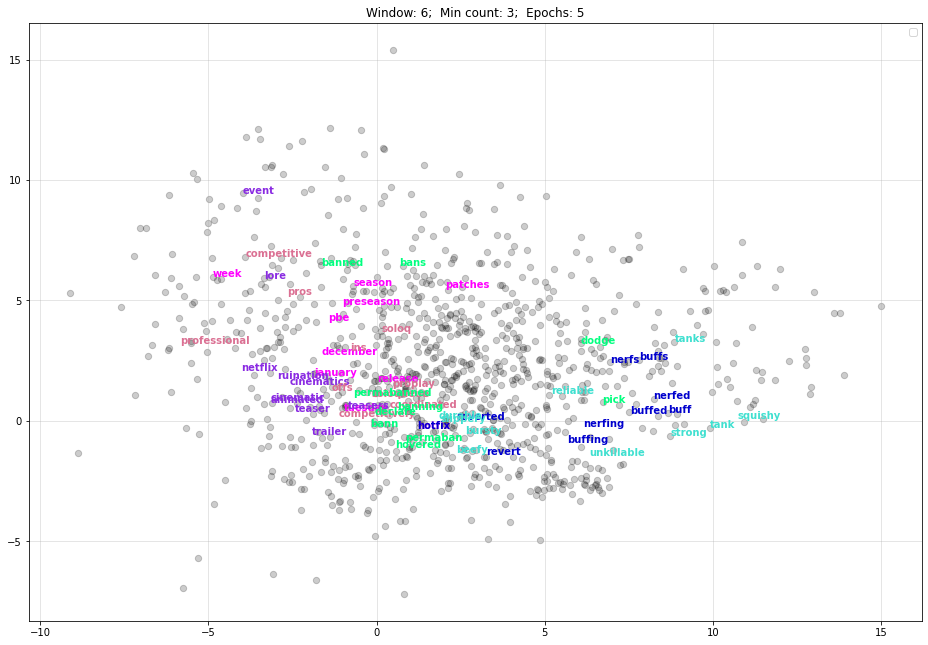

15


No handles with labels found to put in legend.


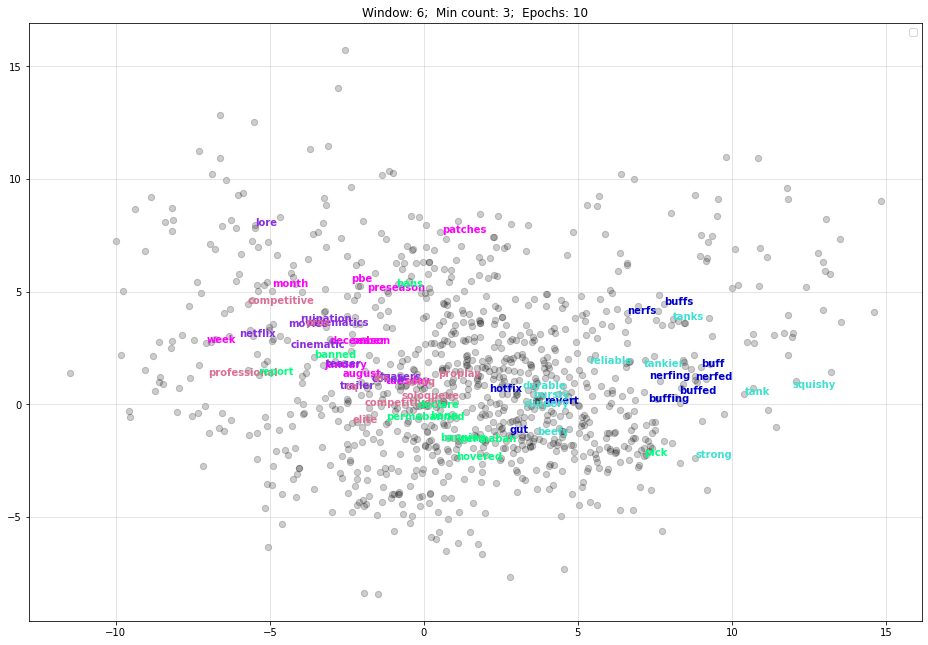

16


No handles with labels found to put in legend.


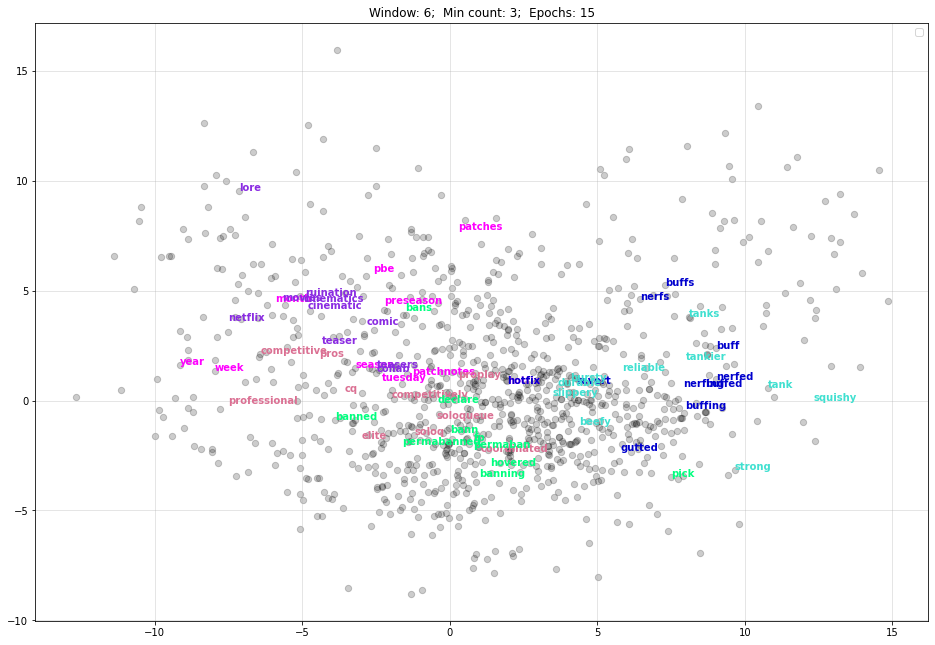

17


No handles with labels found to put in legend.


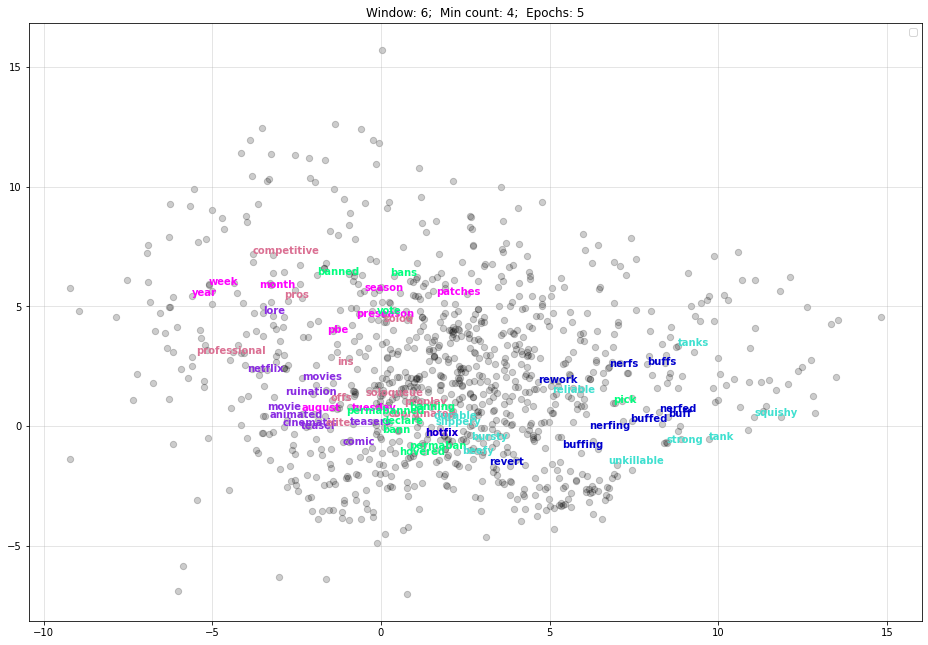

18


No handles with labels found to put in legend.


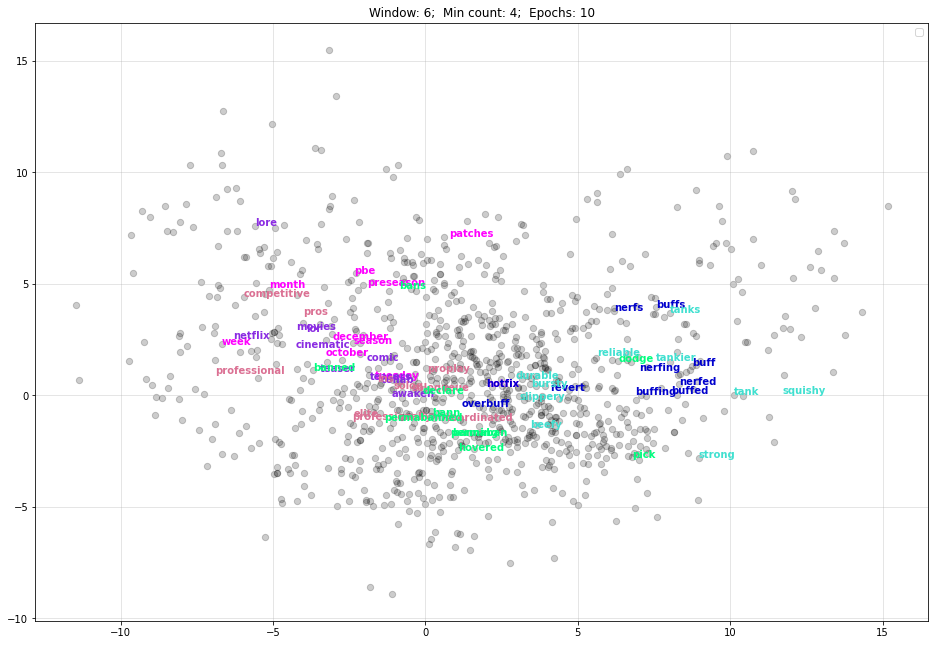

19


No handles with labels found to put in legend.


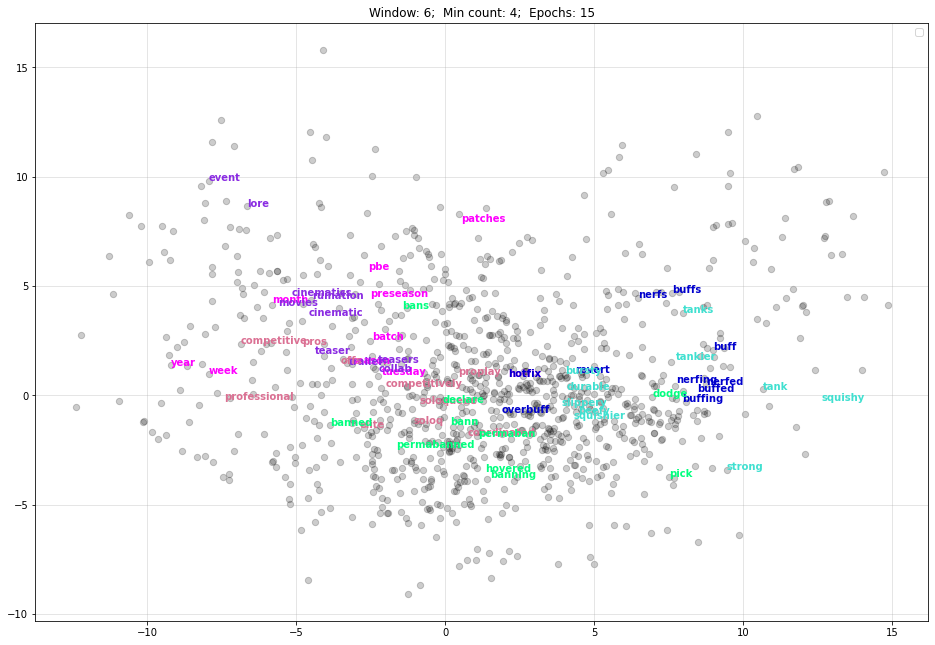

20


No handles with labels found to put in legend.


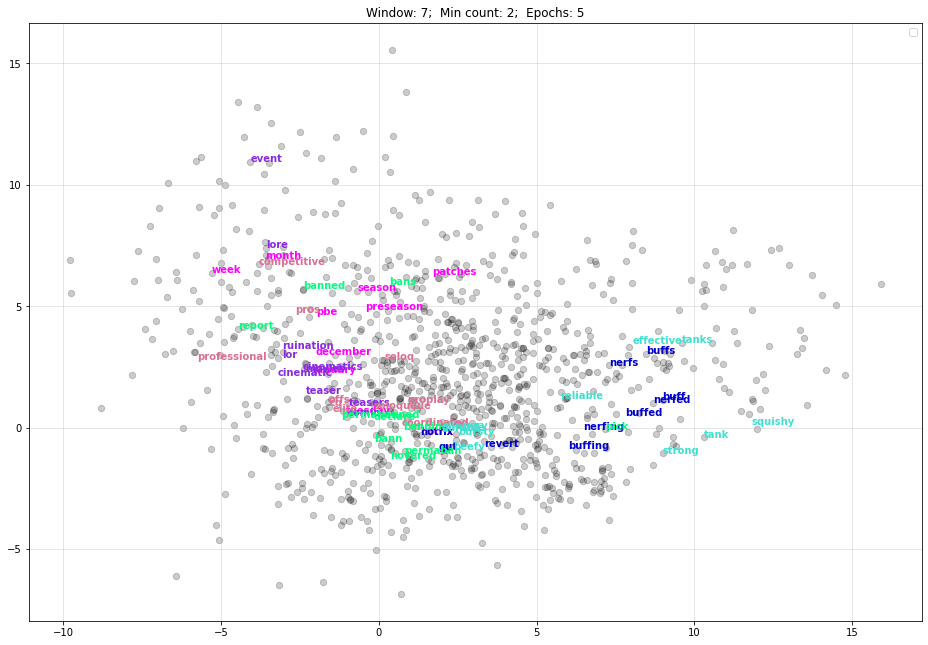

21


No handles with labels found to put in legend.


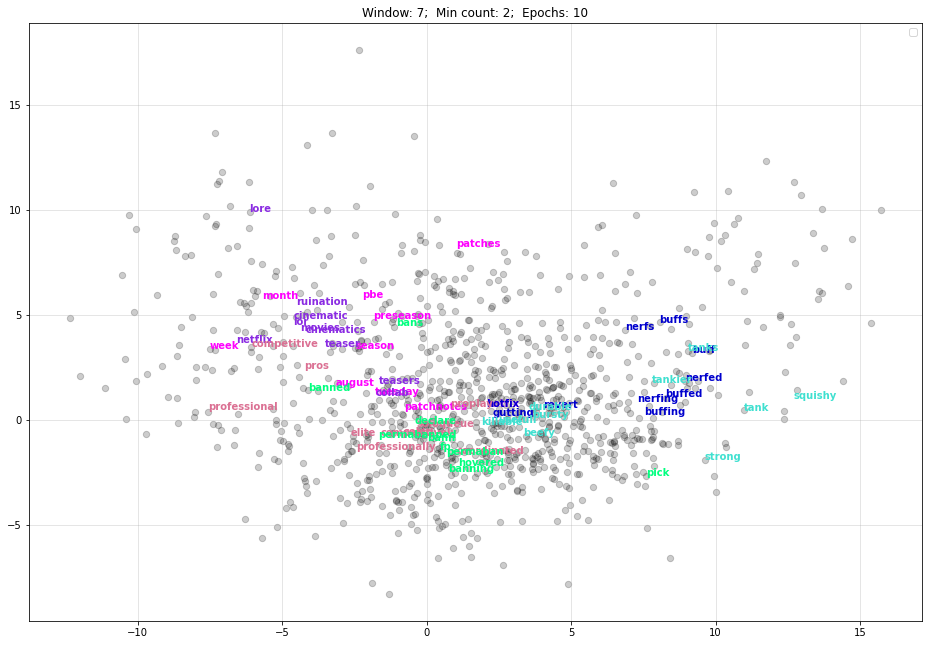

22


No handles with labels found to put in legend.


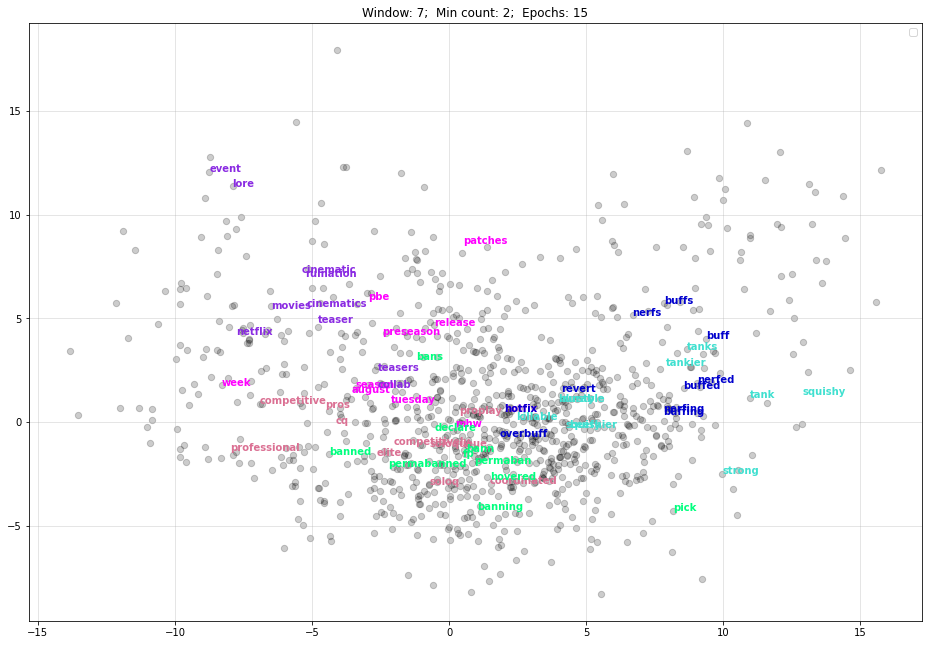

23


No handles with labels found to put in legend.


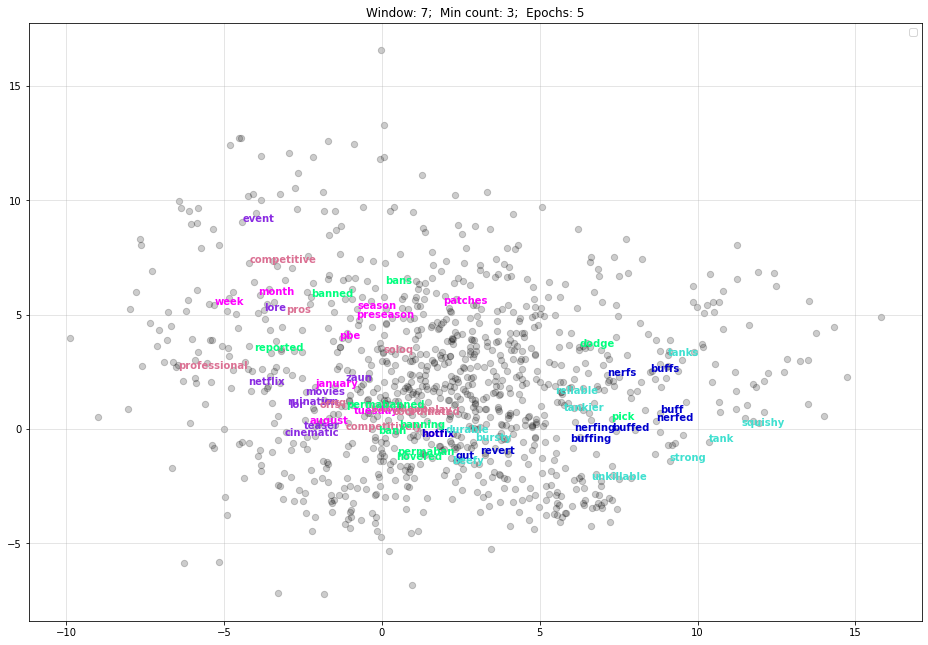

24


No handles with labels found to put in legend.


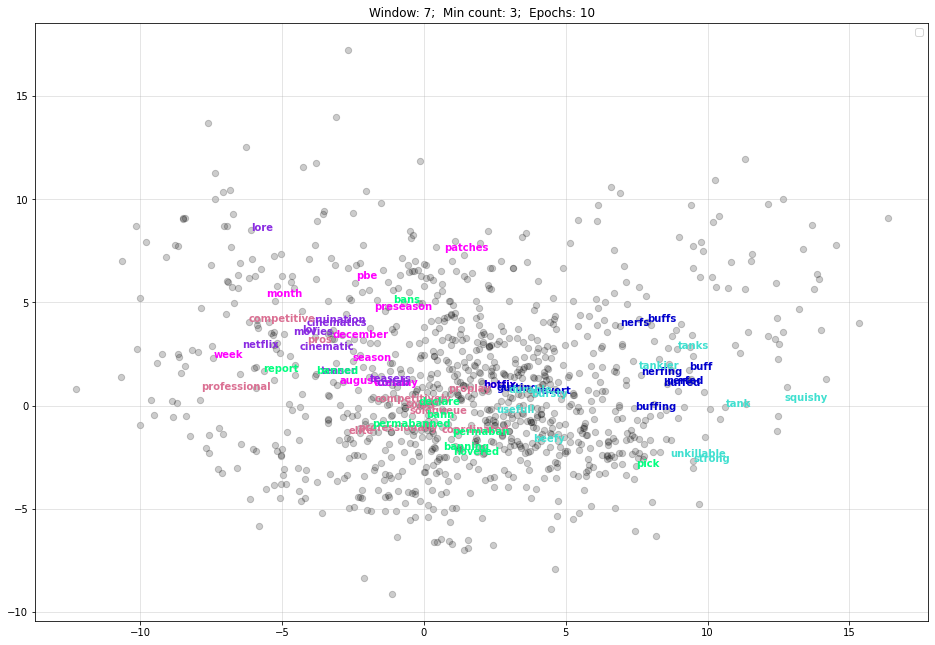

25


No handles with labels found to put in legend.


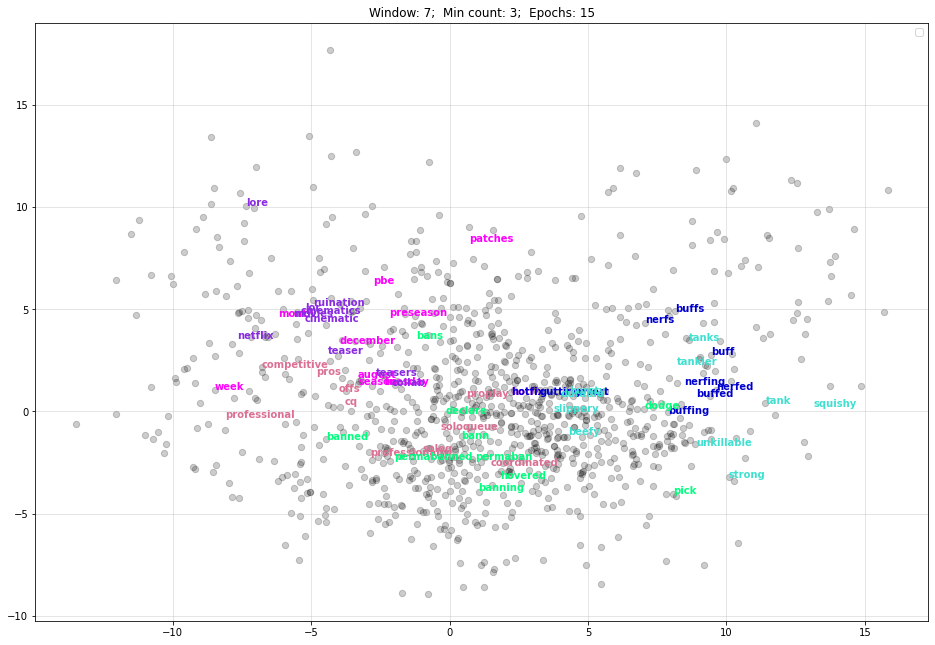

26


No handles with labels found to put in legend.


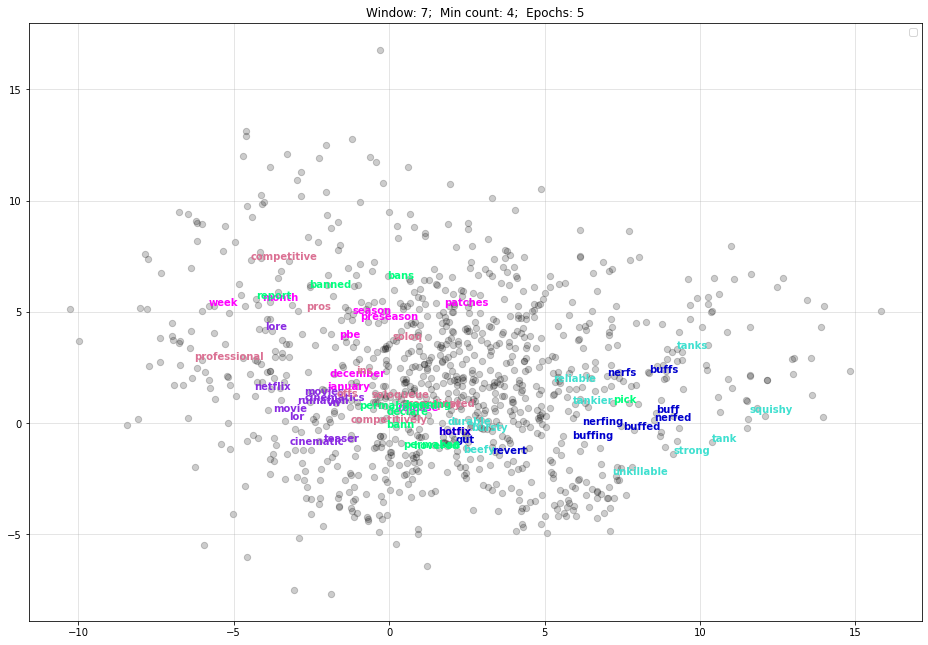

27


No handles with labels found to put in legend.


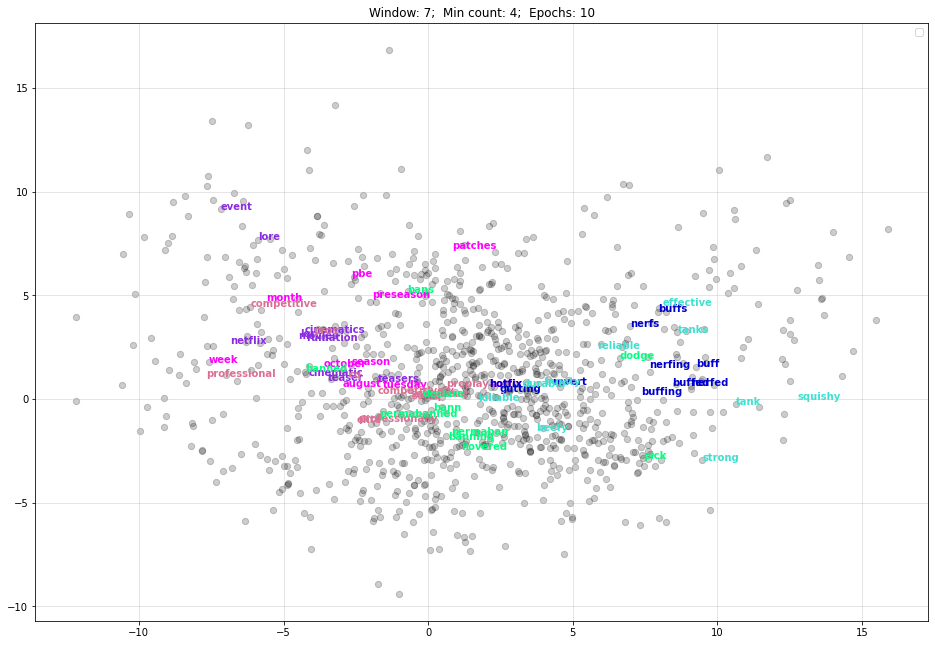

28


No handles with labels found to put in legend.


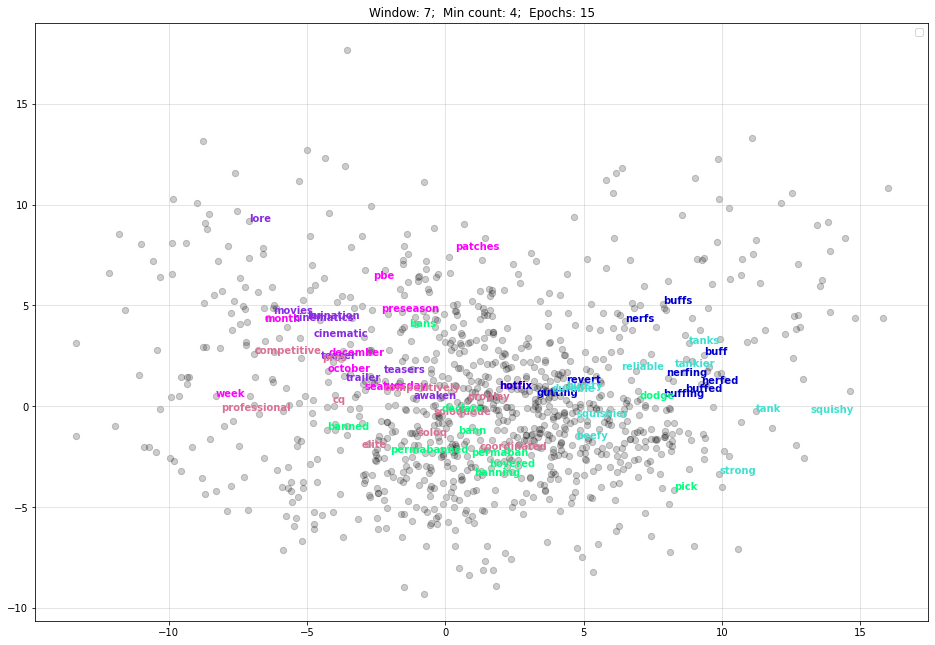

29


No handles with labels found to put in legend.


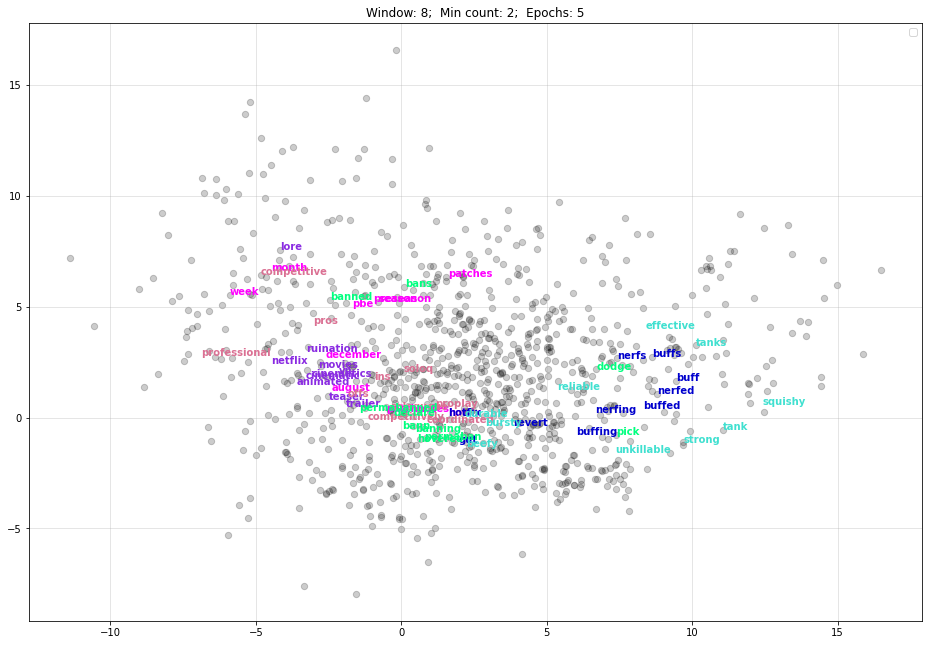

30


No handles with labels found to put in legend.


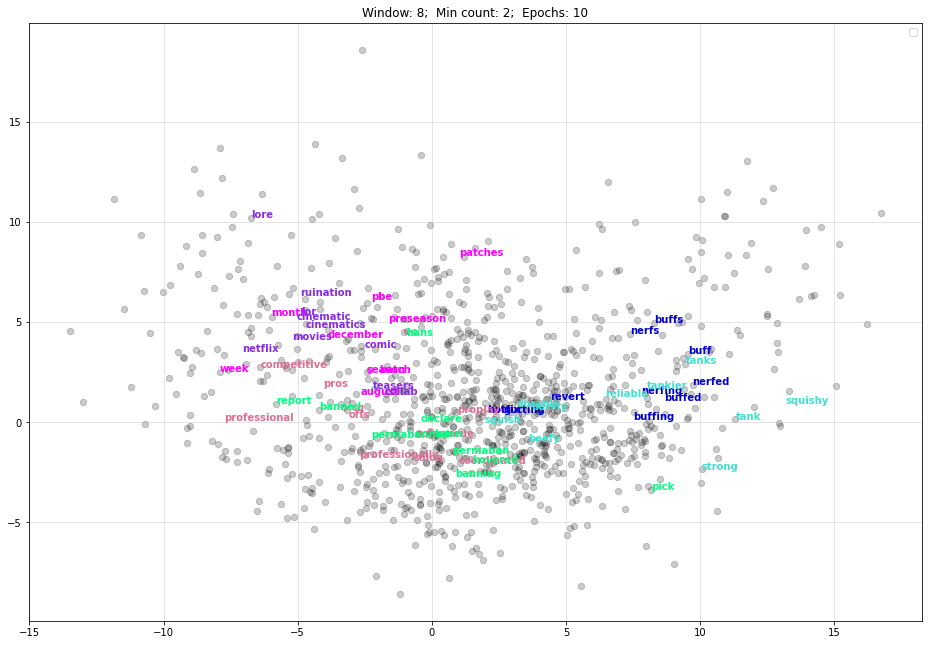

31


No handles with labels found to put in legend.


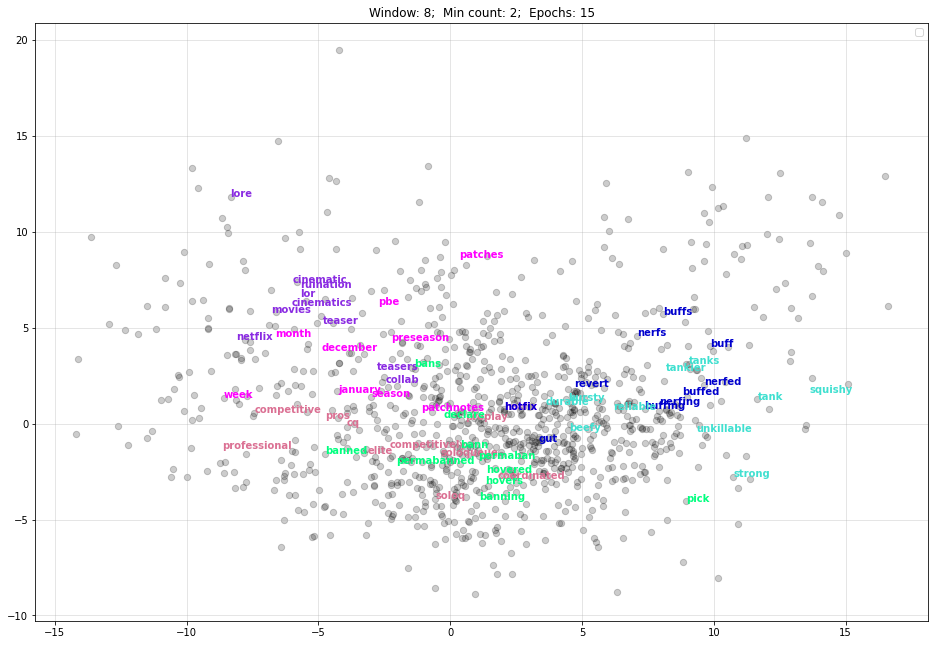

32


No handles with labels found to put in legend.


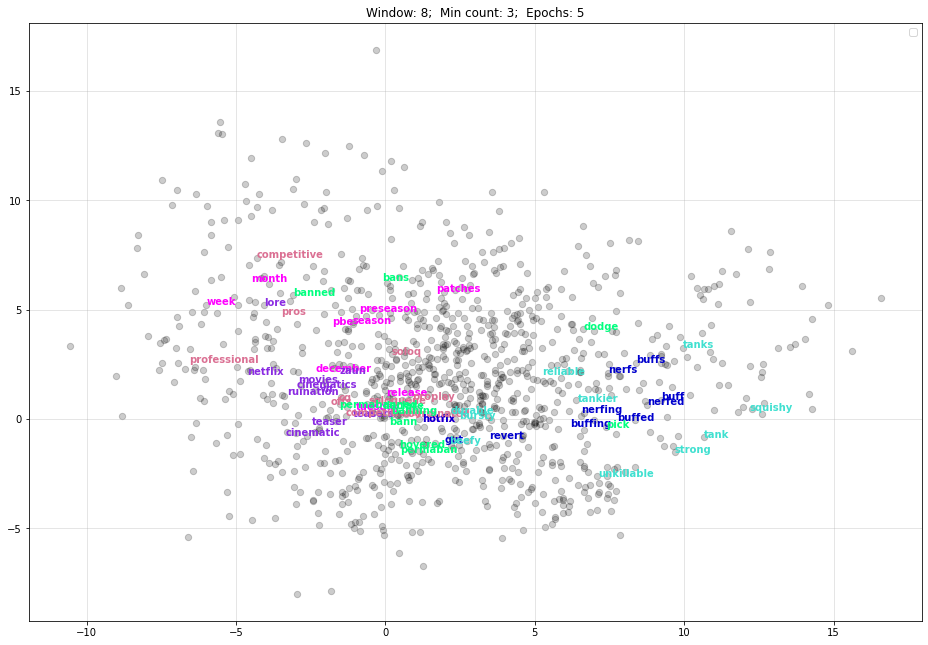

33


No handles with labels found to put in legend.


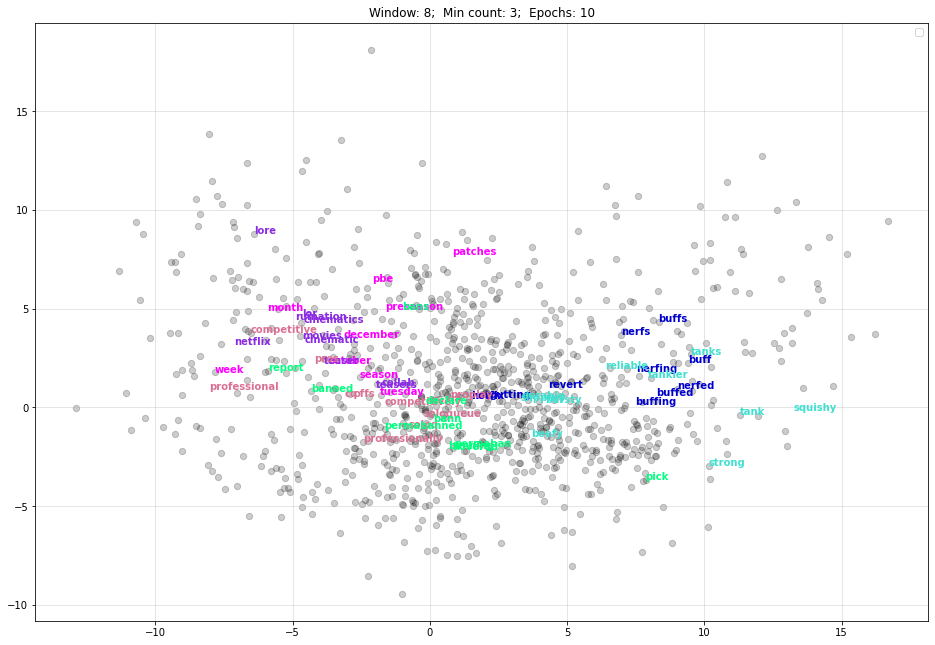

34


No handles with labels found to put in legend.


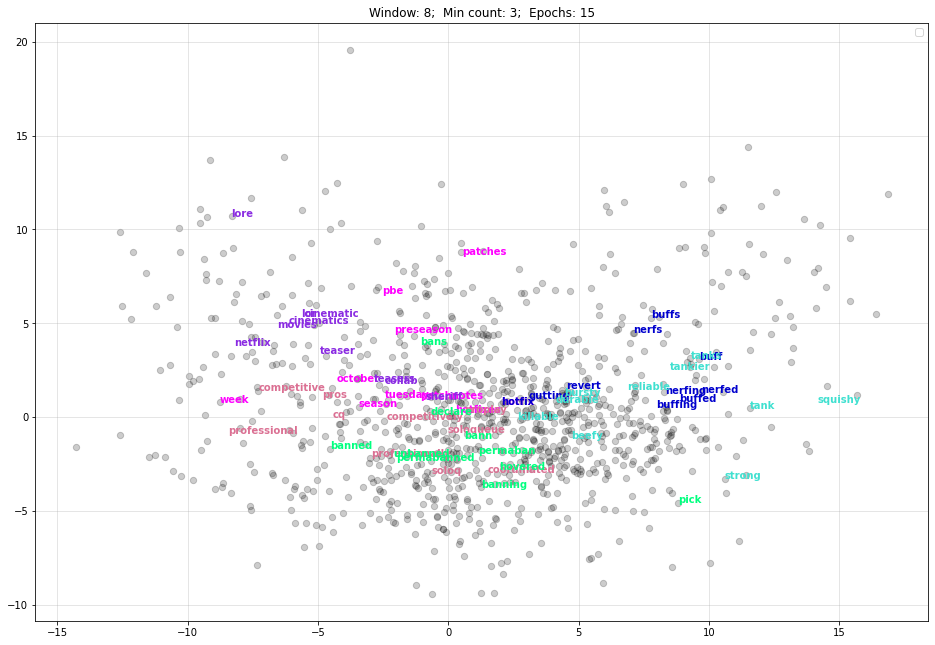

35


No handles with labels found to put in legend.


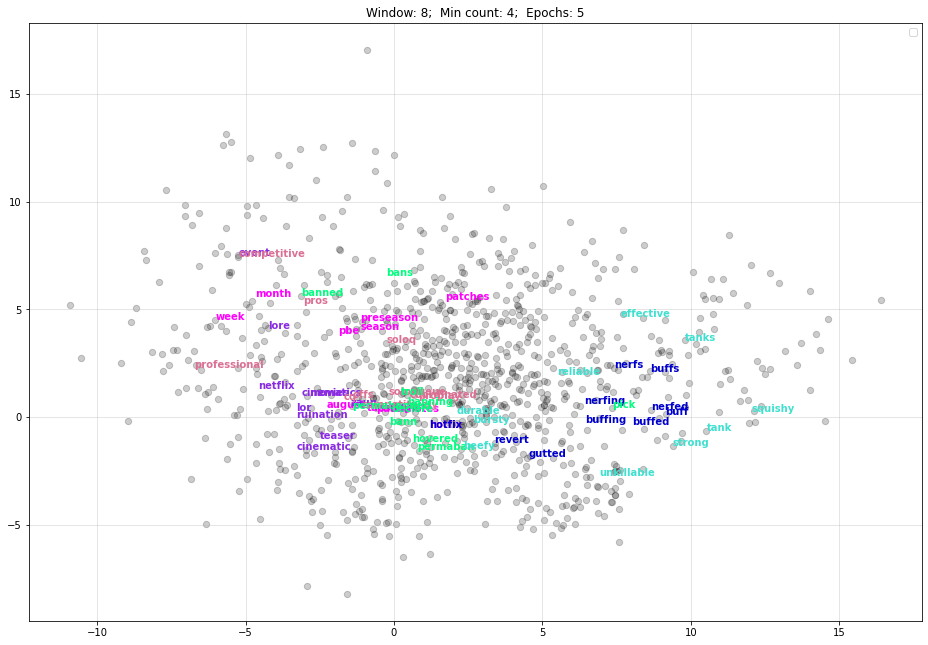

36


No handles with labels found to put in legend.


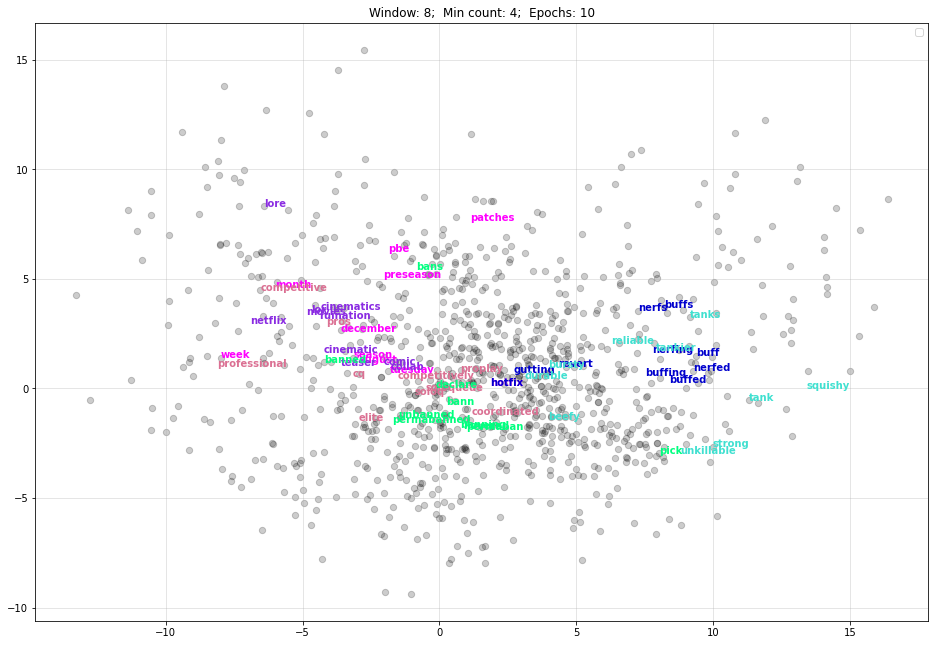

37


No handles with labels found to put in legend.


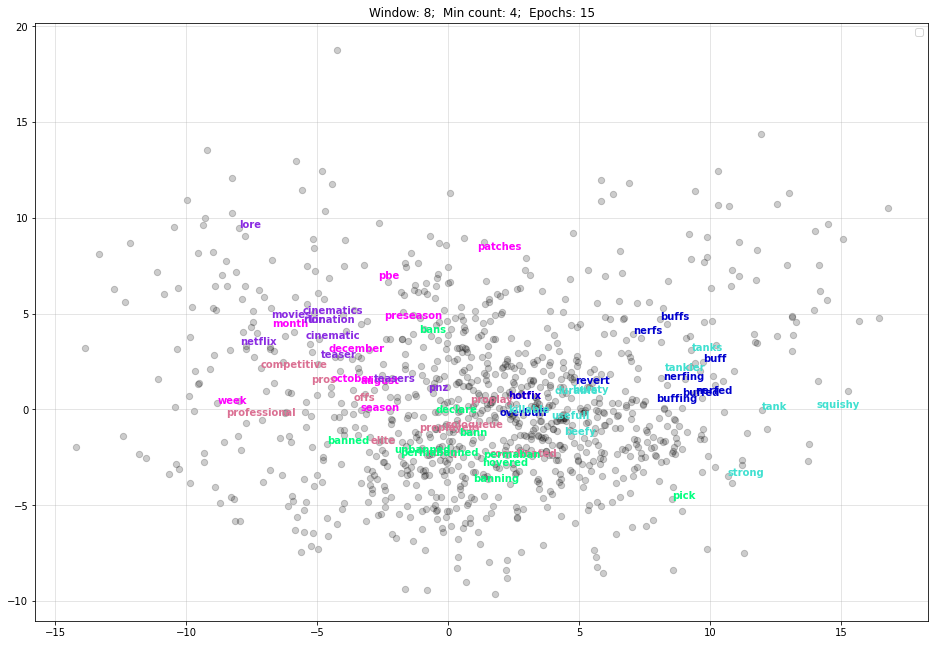

38


No handles with labels found to put in legend.


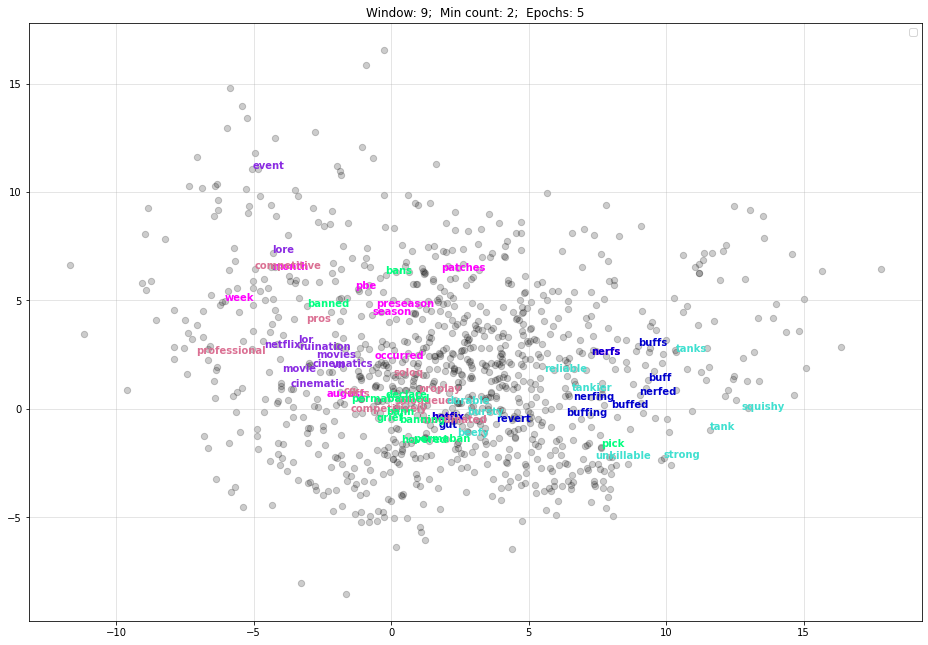

39


No handles with labels found to put in legend.


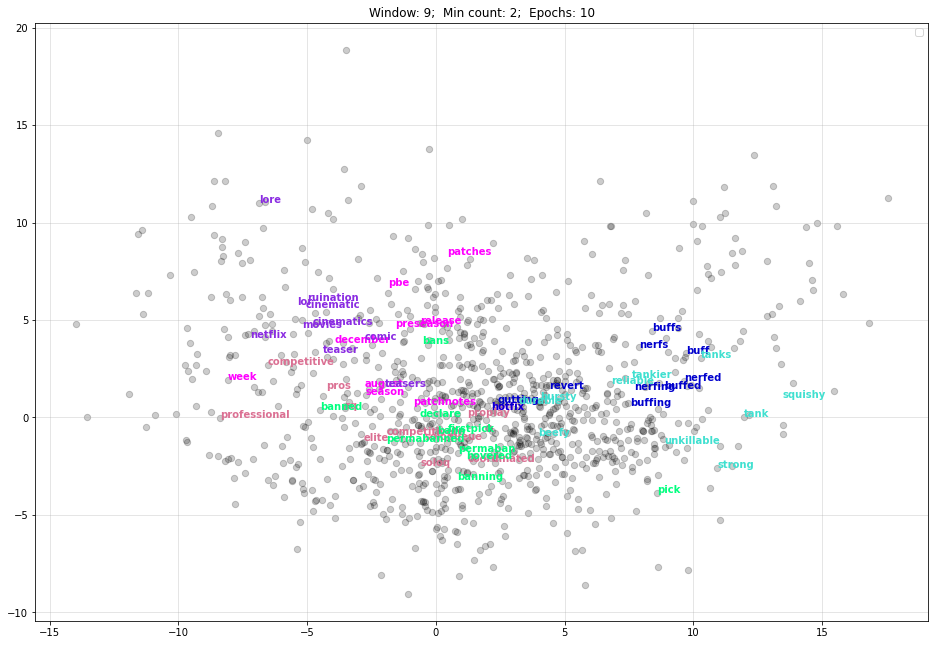

40


No handles with labels found to put in legend.


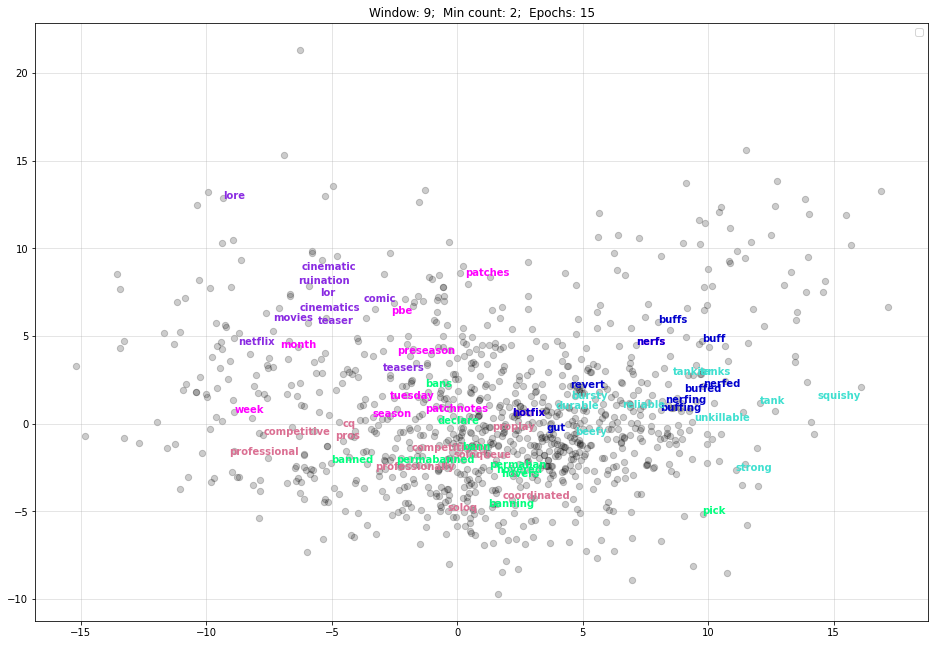

41


No handles with labels found to put in legend.


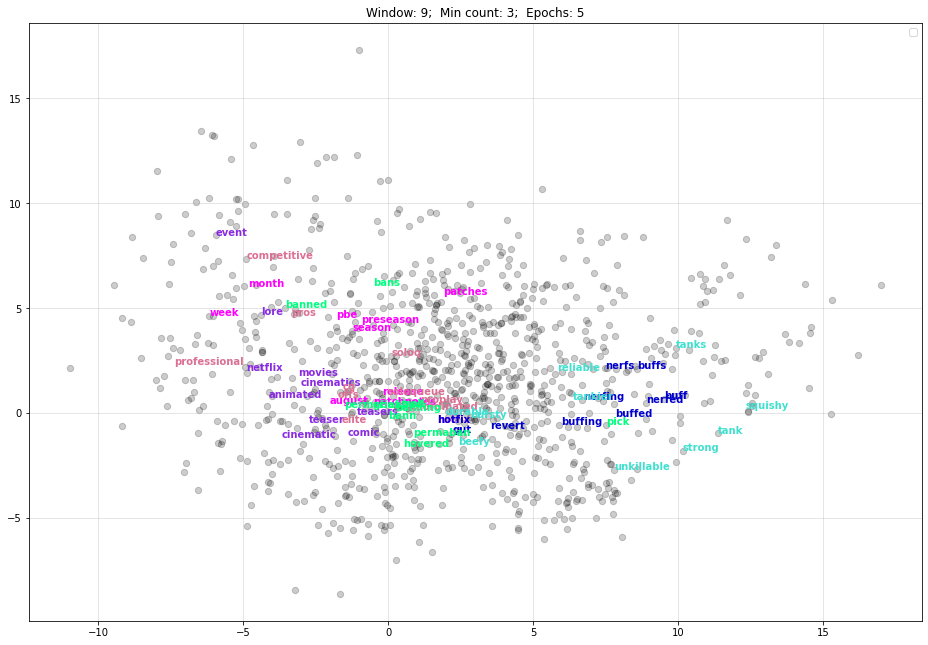

42


No handles with labels found to put in legend.


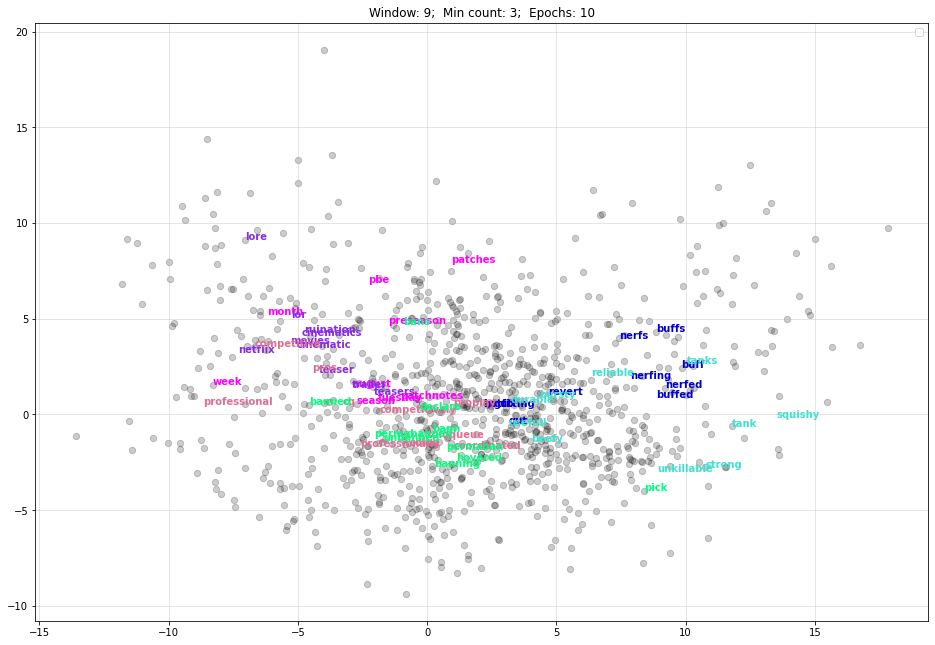

43


No handles with labels found to put in legend.


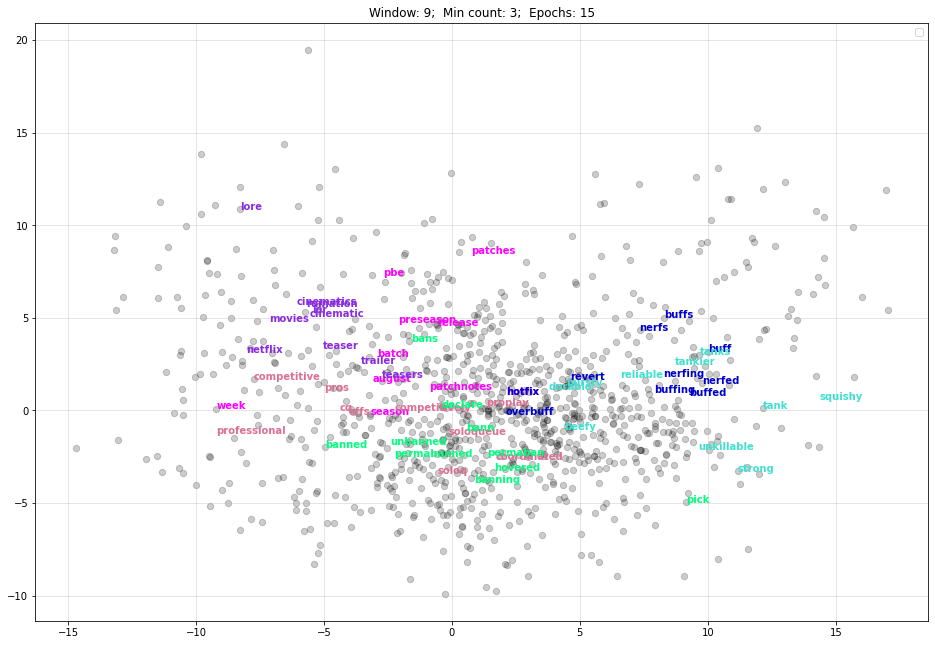

44


No handles with labels found to put in legend.


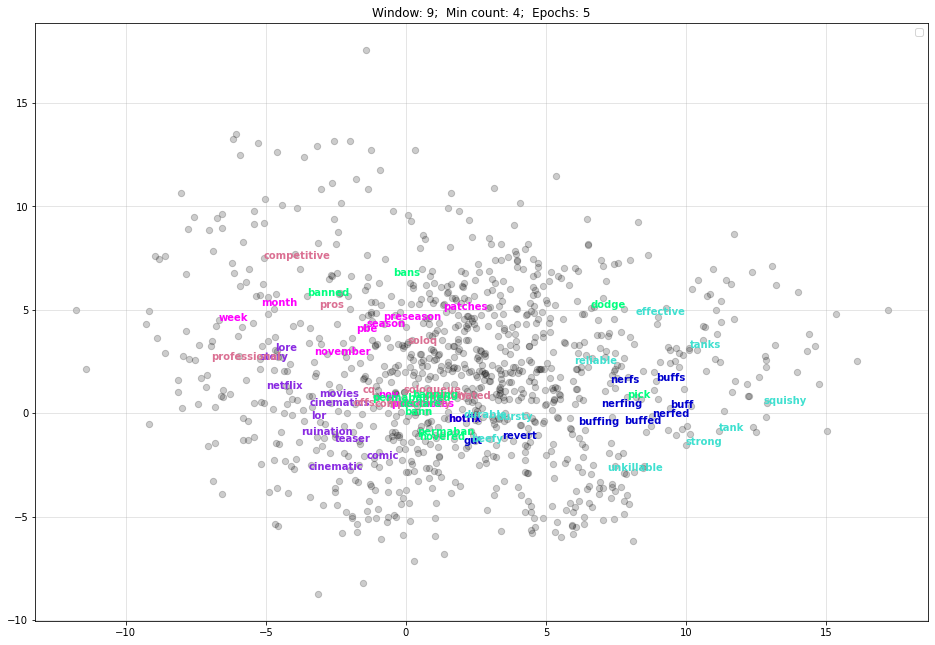

45


No handles with labels found to put in legend.


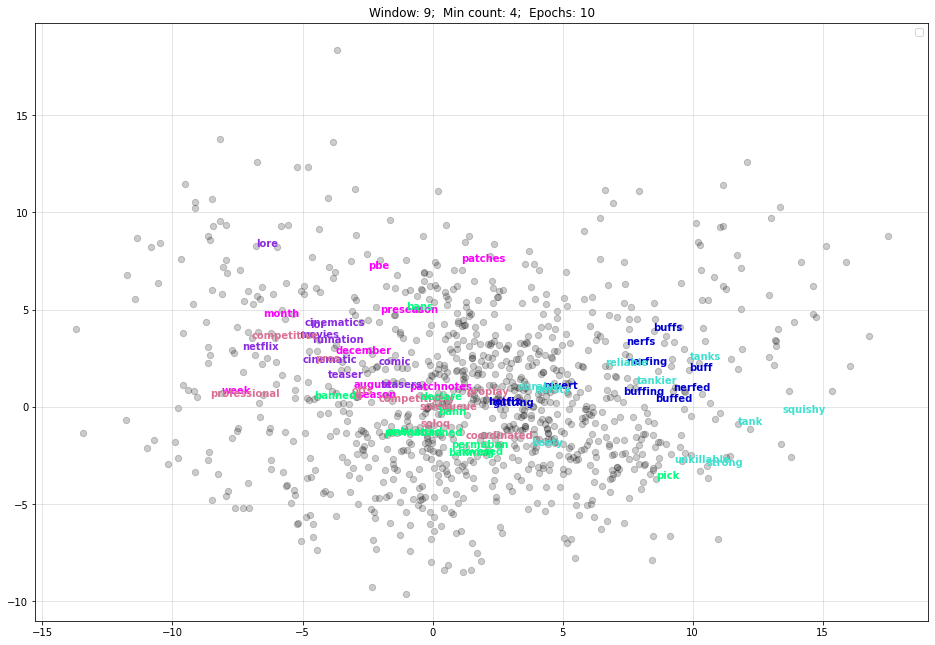

46


No handles with labels found to put in legend.


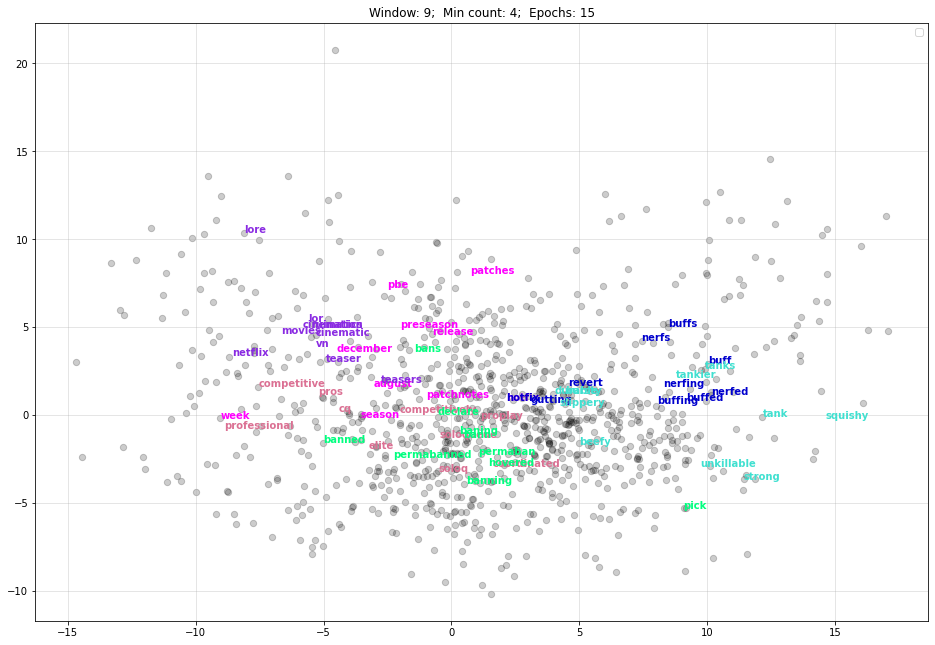

47


No handles with labels found to put in legend.


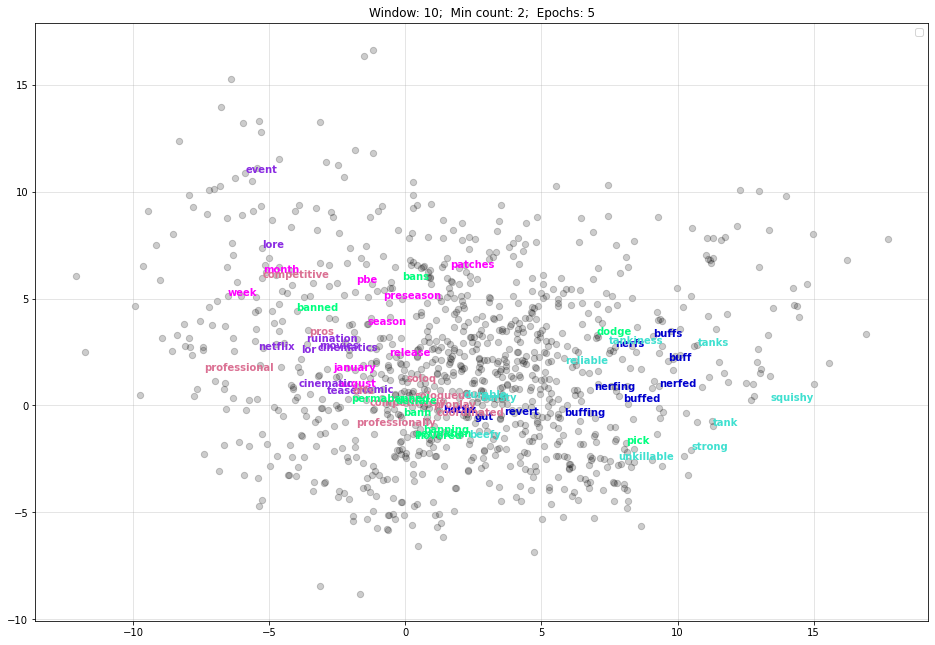

48


No handles with labels found to put in legend.


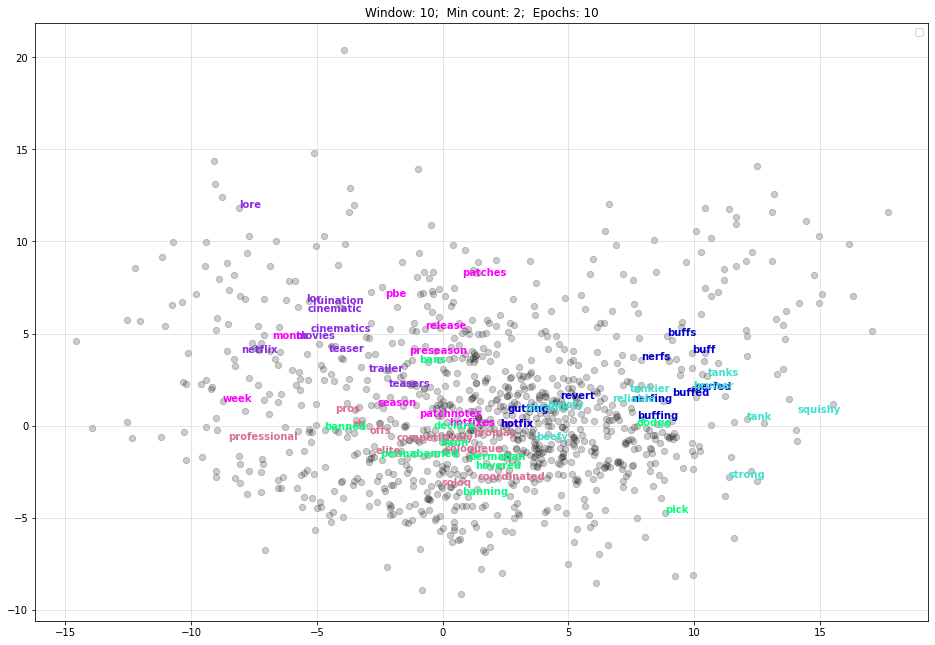

49


No handles with labels found to put in legend.


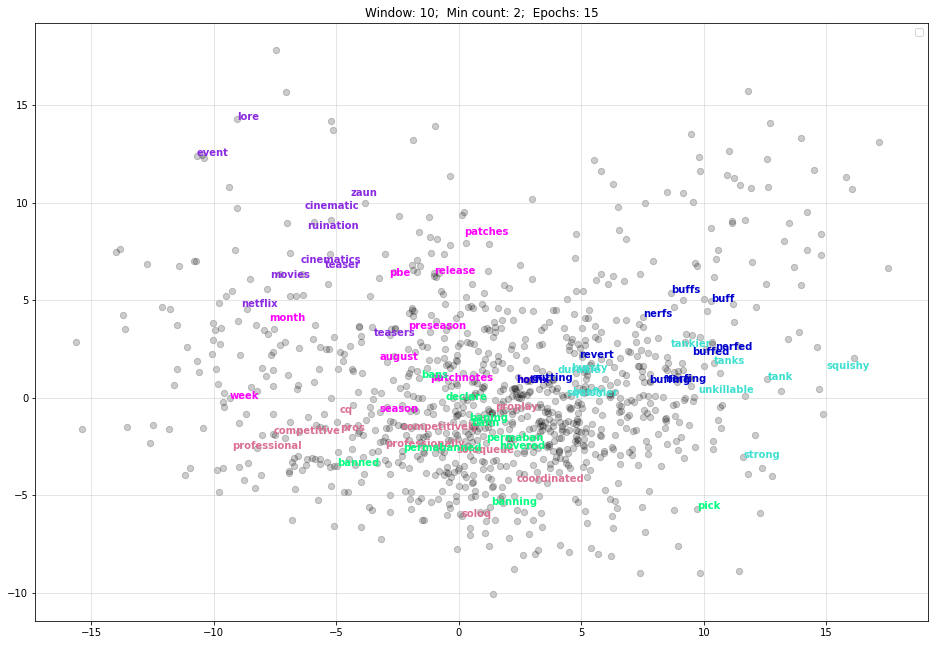

50


No handles with labels found to put in legend.


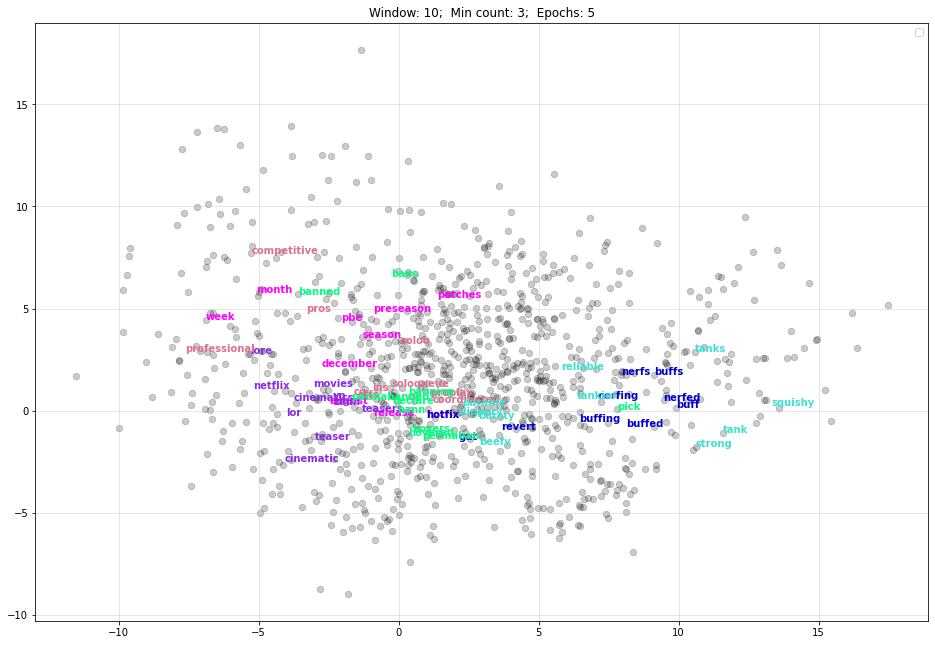

51


No handles with labels found to put in legend.


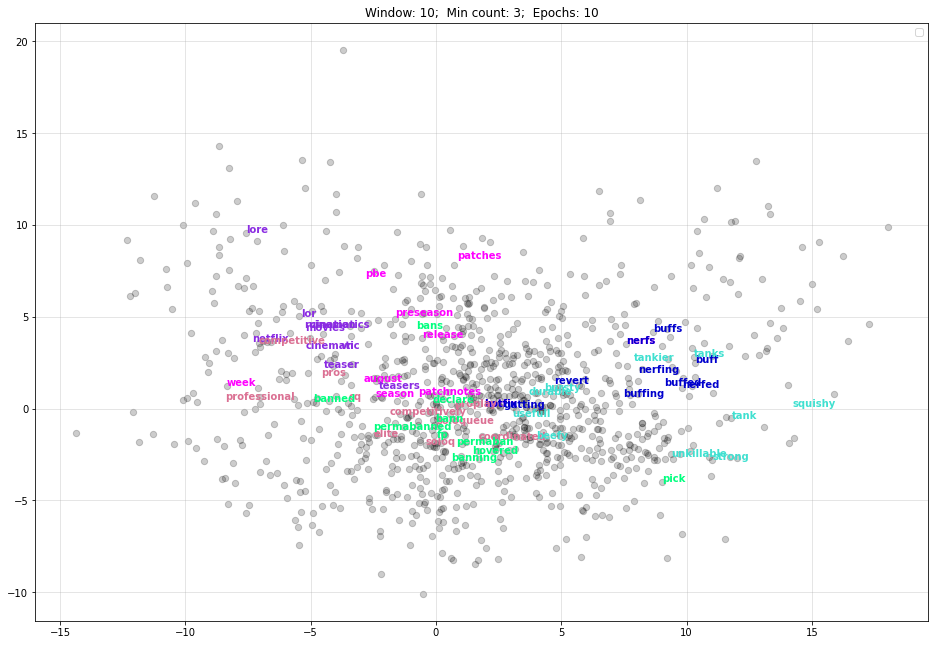

52


No handles with labels found to put in legend.


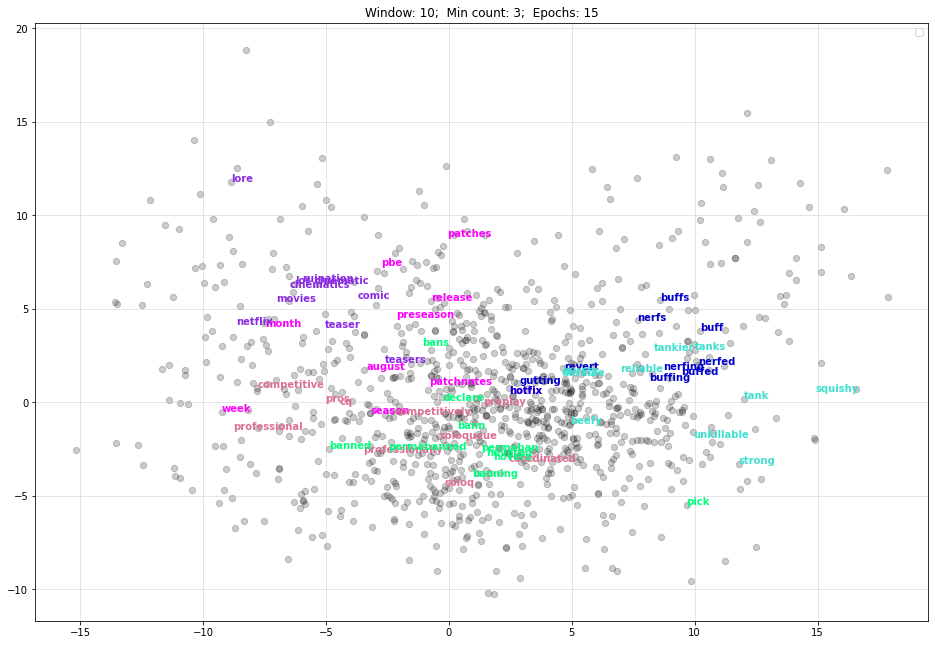

53


No handles with labels found to put in legend.


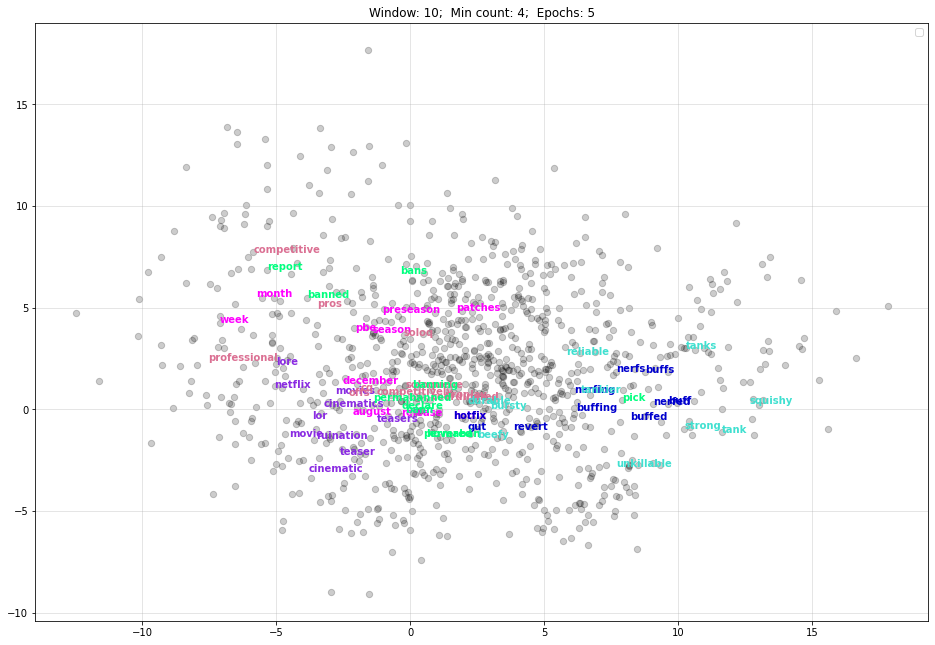

54


No handles with labels found to put in legend.


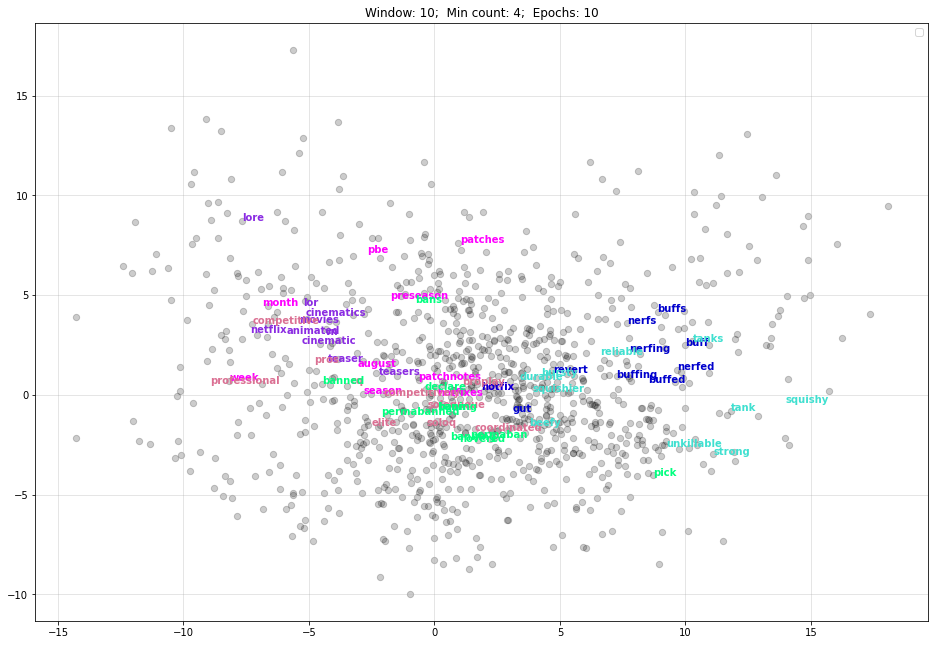

55


No handles with labels found to put in legend.


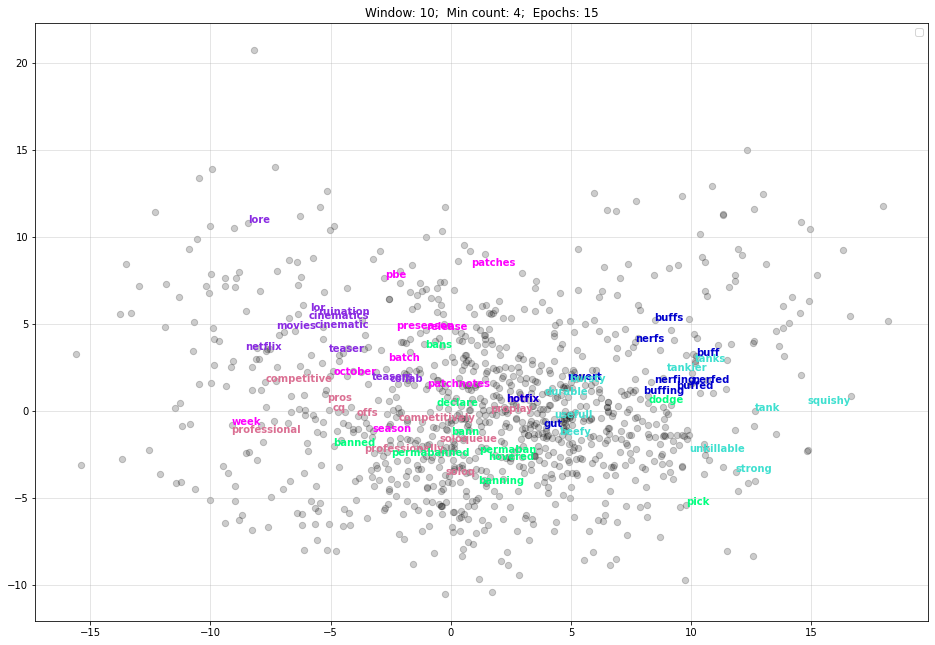

In [8]:
import os
directory = 'models'

model_files = list()
i=1
words = [
    ('patch','fuchsia'),
    ('nerf','mediumblue'),
    ('arcane','blueviolet'),
    ('pro','palevioletred'),
    ('ban','springgreen'),
    ('tanky','turquoise')
]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    print(i)
    i+=1
    if os.path.isfile(f):
        name = str(os.path.join('figures', filename.split('.')[0])) + ".png"
        
        m1 = gensim.models.Word2Vec.load(f)
        helper1 = GensimWord2vecPlotter(m1)
        
        helper1.plot_scatter_words(Size=1000)
        df = helper1.getPandasDF()
        
        for word in words:
            plotwords(m1, word[0],word[1], df)
        plt.savefig(name)
        plt.show()
        

Even after looking at all 54 plots multiple times, it's hard to pick a top model. When producing a ```gif``` of the models (available at ```/capstone/figures/all_models.gif```), we see that words of the same group (as indicated by color) tend to stay in similar regions. The spread of the words, however, changes slightly across models. The idea of visualizing the model was to see what model groups similar words best, but it appears that other metrics are necessary. See more in the next section. 

# Evaluation

Using pairs of words that we as participants in League of Legends pop culture are aware are ground truth similar words, *for each word2vec model* we find the distance between the pairs of words, store them, sort which models produce the shortest distances between the words, and then chose the model that *most frequently* appears in the top three models shortest distance.

In [9]:
import os
from tqdm import tqdm
directory = 'models'
similarities1 = dict()
similarities2 = dict()
similarities3 = dict()
similarities4 = dict()
similarities5 = dict()
similarities6 = dict()
similarities7 = dict()
for filename in tqdm(os.listdir(directory)):
    
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f):
        m = gensim.models.Word2Vec.load(f)
        
        similarities1[filename] = m.wv.distance("jinx","caitlyn")
        similarities2[filename] = m.wv.distance("tanky", "squishy")
        similarities3[filename] = m.wv.distance("professional", "proplay")
        similarities4[filename] = m.wv.distance("buff", "weak")
        similarities5[filename] = m.wv.distance("cait", "vi")
        similarities6[filename] = m.wv.distance("patch", "skin")
        similarities7[filename] = m.wv.distance("twitch", "streamer")

100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [00:15<00:00,  3.46it/s]


In [10]:
bestest = dict()

In [11]:
def count_best(d):
    for i in d:
        if i[0] in bestest.keys():
            bestest[i[0]] += 1
        else:
            bestest[i[0]] = 1

**Example of top five shortest distances for "jinx" and "cait"**

In [12]:
sorted(similarities1.items(), key = lambda x: x[1])[:5]

[('word2vec_5-window_3-min_10-epochs.model', 0.15544486045837402),
 ('word2vec_8-window_4-min_5-epochs.model', 0.1622297167778015),
 ('word2vec_9-window_2-min_5-epochs.model', 0.1623058319091797),
 ('word2vec_8-window_3-min_10-epochs.model', 0.16429221630096436),
 ('word2vec_5-window_2-min_5-epochs.model', 0.164398193359375)]

In [13]:
count_best(sorted(similarities1.items(), key = lambda x: x[1])[:3])

In [14]:
count_best(sorted(similarities2.items(), key = lambda x: x[1])[:3])

In [15]:
count_best(sorted(similarities3.items(), key = lambda x: x[1])[:3])

In [16]:
count_best(sorted(similarities4.items(), key = lambda x: x[1])[:3])

In [17]:
count_best(sorted(similarities5.items(), key = lambda x: x[1])[:3])

In [18]:
count_best(sorted(similarities6.items(), key = lambda x: x[1])[:3])

In [19]:
count_best(sorted(similarities7.items(), key = lambda x: x[1])[:3])

**Sort descending by frequency of *top three* models**

In [20]:
sorted(bestest.items(), key = lambda x: -x[1])

[('word2vec_5-window_2-min_10-epochs.model', 3),
 ('word2vec_5-window_4-min_5-epochs.model', 2),
 ('word2vec_5-window_2-min_5-epochs.model', 2),
 ('word2vec_10-window_3-min_5-epochs.model', 2),
 ('word2vec_5-window_2-min_15-epochs.model', 2),
 ('word2vec_5-window_3-min_10-epochs.model', 1),
 ('word2vec_8-window_4-min_5-epochs.model', 1),
 ('word2vec_9-window_2-min_5-epochs.model', 1),
 ('word2vec_6-window_3-min_5-epochs.model', 1),
 ('word2vec_5-window_3-min_5-epochs.model', 1),
 ('word2vec_8-window_4-min_10-epochs.model', 1),
 ('word2vec_9-window_3-min_10-epochs.model', 1),
 ('word2vec_6-window_2-min_10-epochs.model', 1),
 ('word2vec_6-window_4-min_5-epochs.model', 1),
 ('word2vec_9-window_3-min_5-epochs.model', 1)]

Here, it's also interesting to note that not once is there a model with a window of 7 among the best models, and we only see a model that ran 15 epochs once among the top models. *What would Tyra Banks have to say?*

# Final Comment

Our best model is ```/capstone/models/word2vec_5-window_2-min_10-epochs.model``` based on seven pairs of ground truth similar words, which models had the smallest distances for those words, and which of those models were the most frequent across the seven pairs.